**Jose Gabriel Gonzalez Parra**

**Clase: Mineria de Datos**

**Junio 28-06-23**

# Índice

- [Ejercicio 1](#1)
- [Ejercicio 2](#2)
- [Ejercicio 3](#3)
- [Ejercicio 4](#4)

# Importar librerias

In [1]:
# Estilo
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,10)

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model



# Series temporales
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.holtwinters as ets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
import scipy.stats as stats
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

# Archivo Nuestras funciones

In [2]:
exec(open(r"C:\Users\cex\Desktop\Documentación minería de datos y modelización predictiva - Guillermo Villarino-20230428\NuestrasFunciones.py").read())

# Ejercicio 1

- [1- Reporte descriptivo de los datos. Dimensiones del dataset, número de variables continuas y categóricas. Distribuciones. Comentarios generales.](#1.1)
- [2- Decide si se descarta de inicio alguna de las variables de cara al modelado.](#1.2)
- [3- Ajusta el mejor modelo de regresión lineal con variables originales y sin interacciones entre las variables.](#1.3)
- [4- Ajusta el mejor modelo de regresión lineal con variables originales y con interacciones entre las variables que resulten relevantes.](#1.4)
- [5- Comparación de ambos modelos por validación cruzada repetida. ¿Cuál de ellos tiene mejor comportamiento en generalización?](#1.5)

## 1- Reporte descriptivo de los datos. Dimensiones del dataset, número de variables continuas y categóricas. Distribuciones. Comentarios generales.
<a id="1.1"></a>

In [3]:
fev = pd.read_csv(r"C:\Users\cex\Desktop\Documentación minería de datos y modelización predictiva - Guillermo Villarino-20230428\Datos\FEV_data.csv")
fev.head()

seqnbr  subjid  age    fev  height  sex  smoke
0       1     301    9  1.708    57.0    2      2
1       2     451    8  1.724    67.5    2      2
2       3     501    7  1.720    54.5    2      2
3       4     642    9  1.558    53.0    1      2
4       5     901    9  1.895    57.0    1      2

In [4]:
fev.describe()

seqnbr        subjid         age         fev      height  \
count  654.00000    654.000000  654.000000  654.000000  654.000000   
mean   327.50000  37169.571865    9.931193    2.636780   61.143578   
std    188.93782  23690.860350    2.953935    0.867059    5.703513   
min      1.00000    201.000000    3.000000    0.791000   46.000000   
25%    164.25000  15811.000000    8.000000    1.981000   57.000000   
50%    327.50000  36071.000000   10.000000    2.547500   61.500000   
75%    490.75000  53638.500000   12.000000    3.118500   65.500000   
max    654.00000  90001.000000   19.000000    5.793000   74.000000   

              sex       smoke  
count  654.000000  654.000000  
mean     1.486239    1.900612  
std      0.500193    0.299412  
min      1.000000    1.000000  
25%      1.000000    2.000000  
50%      1.000000    2.000000  
75%      2.000000    2.000000  
max      2.000000    2.000000

In [5]:
fev.smoke.value_counts(normalize=True)

2    0.900612
1    0.099388
Name: smoke, dtype: float64

- En el primer análisis preeliminar descriptivo de los datos , salvo las columnas **seqnbr** y **subjid** que al ser este un número de identificación sus valores media y percentiles no son significativos por lo tanto esta en orden, el resto parece estar bien sin valores atípicos resaltables.

- La variable categorica Smoke no esta balanceada porque contiene un 90% de no fumadores(1) y un 10% de fumadores(2)

In [6]:
fev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seqnbr  654 non-null    int64  
 1   subjid  654 non-null    int64  
 2   age     654 non-null    int64  
 3   fev     654 non-null    float64
 4   height  654 non-null    float64
 5   sex     654 non-null    int64  
 6   smoke   654 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 35.9 KB


Por aqui de momento todo bien también, no se observan valores missing y el tipo de datos para cada columna parece estar correcto.

**Dimensiones del dataset**

In [7]:
fev.shape

(654, 7)

In [8]:
fev.nunique()

seqnbr    654
subjid    654
age        17
fev       575
height     56
sex         2
smoke       2
dtype: int64

**Número de variables continuas y categóricas**

In [9]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
categoricas = list(fev.loc[:,fev.nunique() <= 10]);  
continuas = list(fev.loc[:,fev.nunique() >= 10]); 

In [10]:
print("El numero de variables continuas son",len(continuas), "y estas variables son : \n",continuas)
print("El numero de variables continuas son",len(categoricas), "y estas variables son : \n",categoricas)

El numero de variables continuas son 5 y estas variables son : 
 ['seqnbr', 'subjid', 'age', 'fev', 'height']
El numero de variables continuas son 2 y estas variables son : 
 ['sex', 'smoke']


In [11]:
fev[categoricas] = fev[categoricas].astype('category')

In [12]:
fev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   seqnbr  654 non-null    int64   
 1   subjid  654 non-null    int64   
 2   age     654 non-null    int64   
 3   fev     654 non-null    float64 
 4   height  654 non-null    float64 
 5   sex     654 non-null    category
 6   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(3)
memory usage: 27.2 KB


Observamos como ya las 2 variables con valores unicos menores o iguales a 10 son de valor categórico, lo único que habría que cambiar sería en todo caso los valores de 0 y 1 a 1 y 2 en la columna de **sex**.

**FEV es la variable objetivo**

In [13]:
def plot(col):
     if col.dtypes != 'category':
        print('Cont')
        histogram_boxplot(col, xlabel = col.name, title = 'Distibución continua')
     else:
        print('Cat')
        cat_plot(col).show()

Cont


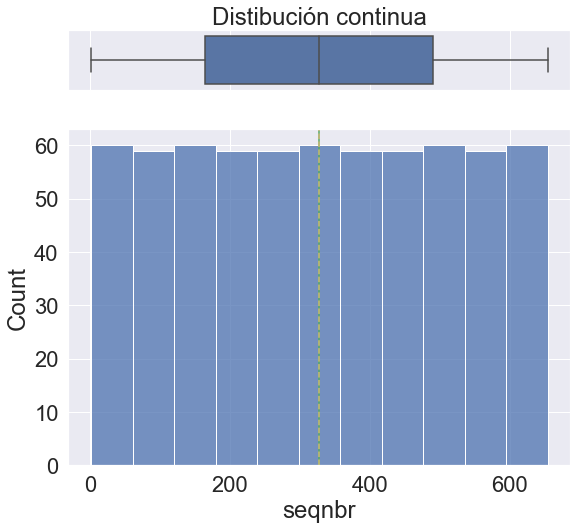

Cont


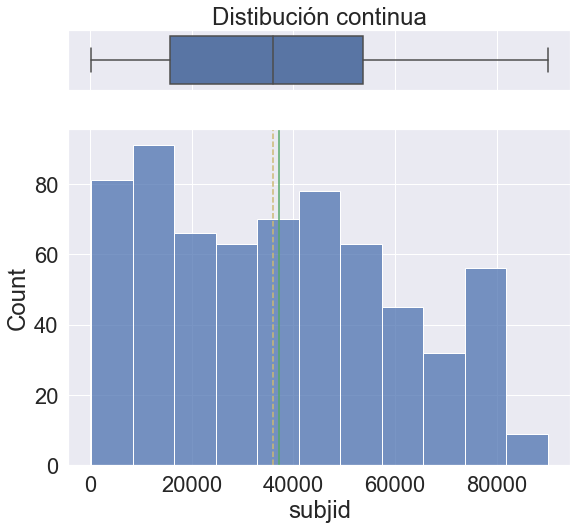

Cont


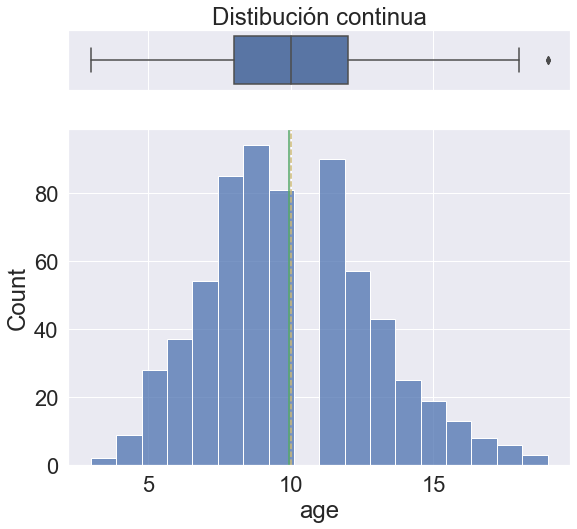

Cont


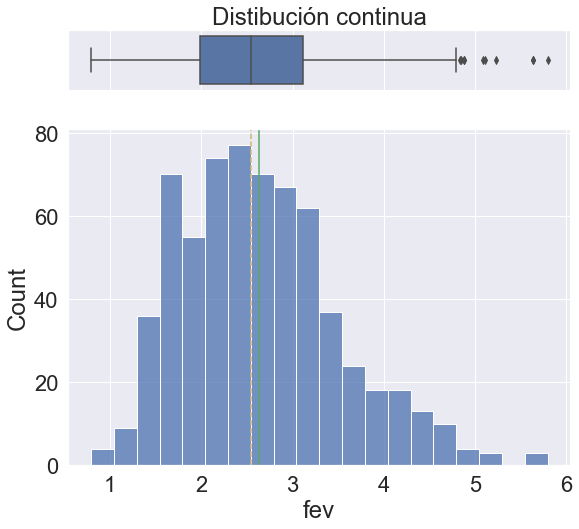

Cont


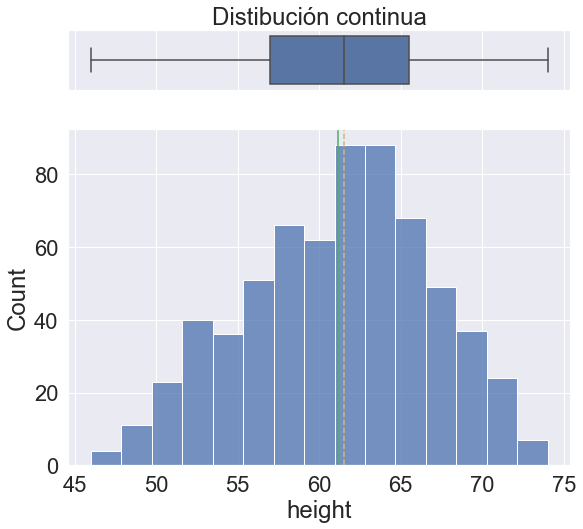

Cat


Cat


seqnbr    None
subjid    None
age       None
fev       None
height    None
sex       None
smoke     None
dtype: object

In [14]:
fev.apply(plot)

### Comentarios generales

**Variables continuas**

Dentro del dataset FEV, observamos 3 variables continuas, **age**,**fev** y **height**, en cuanto a **age** observamos una distribución normal simétrica(la media y la mediana en el mismo valor siendo estas las líneas verdes y naranja) con un rango de valores entre 2 y 18 años ademas de colas no muy largas.**Fev** se trata de una distribución asimétrica positiva donde la cola derecha es mas larga que la cola izquierda, es decir la mediana es mas es el valor de tendencia central mas representativo, con un rango de valores entre 0.791 y 5.793, se observan mas valores que potencialmente podrían ser atípicos en el Boxplot. **Height** distribución asimétrica ligeramente negativa con un rango de valores entre 46.0 y 74.0 y donde no se observan valores atípicos.

**Variables Categóricas**

Las variables categóricas del dataset son **smoke** y **sex**. Sex es una variable dicotómica balanceada es decir con cantidades similares de valores en ambos grupos de hombres y mujeres , siendo estas cantidades de 336 para los hombres y 318 para las mujeres. Smoke es una dicotómica no balanceada es decir hay 65 personas que fuman y 589 que no fuman lo cual sobrepasa ampliamente al grupo de fumadores.

## 2- Decide si se descarta de inicio alguna de las variables de cara al modelado.
<a id="1.2"></a>

A priori se descartarian las 2 primeras variables :

- seqnbr : Esta debido a que simplemente indica el número del paciente que fue objeto de estudio
    
- subjid : Debido a que es un código de identificación interno del estudio por lo tanto no tiene relevancia en nuestra variable objetivo
    

In [15]:
fev.drop(['seqnbr','subjid'],axis=1,inplace=True)
fev

age    fev  height sex smoke
0      9  1.708    57.0   2     2
1      8  1.724    67.5   2     2
2      7  1.720    54.5   2     2
3      9  1.558    53.0   1     2
4      9  1.895    57.0   1     2
..   ...    ...     ...  ..   ...
649   16  4.270    67.0   1     1
650   15  3.727    68.0   1     1
651   18  2.853    60.0   2     2
652   16  2.795    63.0   2     1
653   15  3.211    66.5   2     2

[654 rows x 5 columns]

### Reemplazar 0 y 1 en sex y smoke

In [16]:
cols = ['smoke','sex']
fev[cols] = fev[cols].replace({1:0, 2:1})

In [17]:
fev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     654 non-null    int64   
 1   fev     654 non-null    float64 
 2   height  654 non-null    float64 
 3   sex     654 non-null    category
 4   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(1)
memory usage: 17.0 KB


0 para hombres, 1 mujeres y 0 para fumadores y 1 para no fumadores

## 3- Ajusta el mejor modelo de regresión lineal con variables originales y sin interacciones entre las variables.
<a id="1.3"></a>

In [18]:
varObjCont = fev.fev
imputCompra = fev.drop('fev',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imputCompra, varObjCont, test_size=0.2, random_state=42)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (523, 4) (523,)
Testing dataset shape: (131, 4) (131,)


In [20]:
data_train = X_train.join(y_train)
data_train.head()

age  height sex smoke    fev
321   12    71.0   0     1  4.550
456   12    68.0   0     1  4.411
340   10    62.0   0     1  1.937
29     9    60.0   1     1  2.100
570   10    65.0   0     1  3.090

## Modelo Completo

Ahora procederemos a ajustar el mejor modelo de planteando el modelo de referencia y eliminando ciertas variables metiante el método backwards. Después procederemos a seleccionar el mejor modelo utilizando validación cruzada.

In [21]:
form=ols_formula(data_train,'fev')
form

'fev ~ age + height + sex + smoke'

In [22]:
modeloC = ols(form,data=data_train).fit()
modeloC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     423.4
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.09e-161
Time:                        22:50:23   Log-Likelihood:                -281.13
No. Observations:                 523   AIC:                             572.3
Df Residuals:                     518   BIC:                             593.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3576      0.271    -16.067      0.000      -4.890      -3.825
sex[T.1]      -0.1511      0.038     -4.028      0.000      -0.225      -0.077
smoke[T.1]     0.0652      0.066      0.983      0.326      -0.065       0.196
age            0.0632      0.011      5.678      0.000       0.041       0.085
height         0.1041      0.005     19.150      0.000       0.093       0.115
==============================================================================
Omnibus:                       11.617   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.038
Skew:                           0.178   Prob(JB):                     0.000200
Kurtosis:                       3.810   Cond. No.                         932.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Variables mas importantes para el modelo**

In [23]:
import patsy
y, X = patsy.dmatrices(form, data_train, return_type='dataframe')

In [24]:
from relativeImp import relativeImp
names=X.columns.tolist()[1:]
df_results = relativeImp(X.join(y), outcomeName = 'fev', driverNames = names)
df_results.sort_values(by='normRelaImpt', ascending=False)

driver  rawRelaImpt  normRelaImpt
3      height     0.443669     57.937958
2         age     0.277787     36.275651
0    sex[T.1]     0.024235      3.164859
1  smoke[T.1]     0.020075      2.621533

In [25]:
model1 = ols('fev ~ height + age',data=fev).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1068.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          2.71e-206
Time:                        22:50:23   Log-Likelihood:                -358.68
No. Observations:                 654   AIC:                             723.4
Df Residuals:                     651   BIC:                             736.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6105      0.224    -20.558      0.000      -5.051      -4.170
height         0.1097      0.005     23.263      0.000       0.100       0.119
age            0.0543      0.009      5.961      0.000       0.036       0.072
==============================================================================
Omnibus:                       32.399   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.675
Skew:                           0.271   Prob(JB):                     4.50e-16
Kurtosis:                       4.516   Cond. No.                         851.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model2 = ols('fev ~ height + age + smoke',data=fev).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     715.7
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.86e-205
Time:                        22:50:23   Log-Likelihood:                -356.98
No. Observations:                 654   AIC:                             722.0
Df Residuals:                     650   BIC:                             739.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7262      0.233    -20.322      0.000      -5.183      -4.270
smoke[T.1]     0.1102      0.060      1.837      0.067      -0.008       0.228
height         0.1091      0.005     23.115      0.000       0.100       0.118
age            0.0597      0.010      6.247      0.000       0.041       0.079
==============================================================================
Omnibus:                       31.673   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.104
Skew:                           0.292   Prob(JB):                     1.20e-14
Kurtosis:                       4.419   Cond. No.                         886.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model3 = ols('fev ~ height + age + sex',data=fev).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     744.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          9.05e-210
Time:                        22:50:23   Log-Likelihood:                -346.99
No. Observations:                 654   AIC:                             702.0
Df Residuals:                     650   BIC:                             719.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2874      0.230    -18.621      0.000      -4.740      -3.835
sex[T.1]      -0.1611      0.033     -4.864      0.000      -0.226      -0.096
height         0.1046      0.005     21.986      0.000       0.095       0.114
age            0.0614      0.009      6.766      0.000       0.044       0.079
==============================================================================
Omnibus:                       23.453   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.454
Skew:                           0.189   Prob(JB):                     4.96e-11
Kurtosis:                       4.264   Cond. No.                         890.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model4 = ols('fev ~ height + smoke + sex',data=fev).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     681.9
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          3.06e-200
Time:                        22:50:23   Log-Likelihood:                -369.07
No. Observations:                 654   AIC:                             746.1
Df Residuals:                     650   BIC:                             764.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2003      0.216    -24.048      0.000      -5.625      -4.776
smoke[T.1]    -0.0341      0.059     -0.583      0.560      -0.149       0.081
sex[T.1]      -0.1276      0.034     -3.744      0.000      -0.195      -0.061
height         0.1297      0.003     41.756      0.000       0.124       0.136
==============================================================================
Omnibus:                       30.516   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.282
Skew:                           0.220   Prob(JB):                     3.32e-16
Kurtosis:                       4.557   Cond. No.                         805.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Una vez hechas las combinaciones probemoslas con validación cruzada para decidir finalmente cual sera el modelo elegido :

In [29]:
form = 'fev ~ age + height + sex + smoke'
form1 = 'fev ~ height + age'
form2 = 'fev ~ height + age + smoke'
form3 = 'fev ~ height + age + sex'
form4  = 'fev ~ height + smoke + sex'

list_form = [form, form1, form2,form3,form4]

Modelo: fev ~ age + height + sex + smoke
Coeficiente de determinaciÃ³n R2: 0.755 (0.035)
Modelo: fev ~ height + age
Coeficiente de determinaciÃ³n R2: 0.750 (0.036)
Modelo: fev ~ height + age + smoke
Coeficiente de determinaciÃ³n R2: 0.748 (0.036)
Modelo: fev ~ height + age + sex
Coeficiente de determinaciÃ³n R2: 0.756 (0.035)
Modelo: fev ~ height + smoke + sex
Coeficiente de determinaciÃ³n R2: 0.741 (0.038)


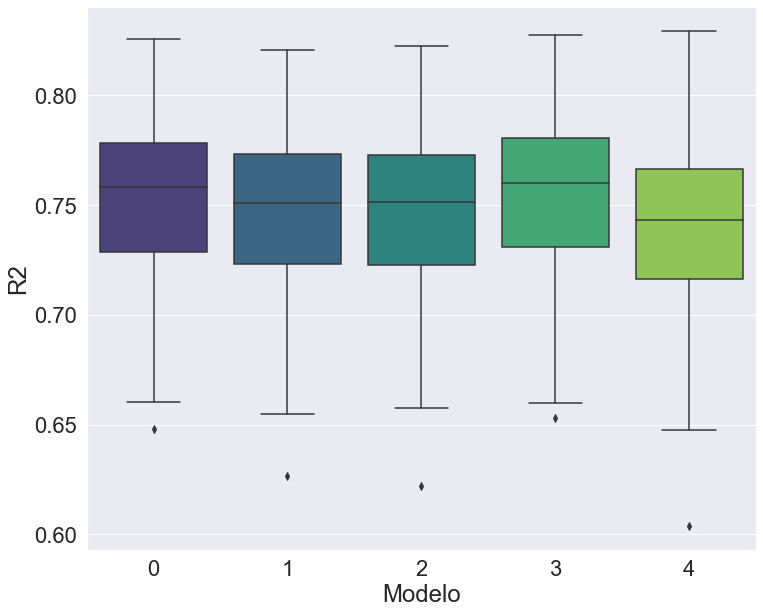

In [30]:
list_res = pd.DataFrame(map(lambda x: cross_val_lin(x,data_train, seed=2022),list_form))
results = list_res.T.melt()
results.columns = ['Modelo','R2']

sns.boxplot(x='Modelo',y='R2',data=results,palette='viridis');

## Conclusión 
Cualquiera de los 2 siguientes modelos podría ser seleccionado :

 - Modelo: fev ~ age + height + sex + smoke R2 = 0.755
 - Modelo: fev ~ height + age + sex R2 = 0.756

El modelo a seleccionar será el **Modelo: fev ~ height + age + sex R2 = 0.756** debido a un R2 ligeramente mayor y menos complejo.

## 4- Ajusta el mejor modelo de regresión lineal con variables originales y con interacciones entre las variables que resulten relevantes.
<a id="1.4"></a>

**Dataset con Interacciones**

In [31]:
from sklearn.preprocessing import PolynomialFeatures
interacciones = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
interacciones

PolynomialFeatures(include_bias=False, interaction_only=True)

In [32]:
fev_inter = pd.DataFrame(interacciones.fit_transform(fev.drop('fev',axis=1)), columns=interacciones.get_feature_names_out(input_features=fev.drop('fev',axis=1).columns))
fev_inter.head()

age  height  sex  smoke  age height  age sex  age smoke  height sex  \
0  9.0    57.0  1.0    1.0       513.0      9.0        9.0        57.0   
1  8.0    67.5  1.0    1.0       540.0      8.0        8.0        67.5   
2  7.0    54.5  1.0    1.0       381.5      7.0        7.0        54.5   
3  9.0    53.0  0.0    1.0       477.0      0.0        9.0         0.0   
4  9.0    57.0  0.0    1.0       513.0      0.0        9.0         0.0   

   height smoke  sex smoke  
0          57.0        1.0  
1          67.5        1.0  
2          54.5        1.0  
3          53.0        0.0  
4          57.0        0.0

**Training Test**

In [33]:
varObjCont = fev.fev
imputCompra = fev_inter

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imputCompra, varObjCont, test_size=0.2, random_state=42)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (523, 10) (523,)
Testing dataset shape: (131, 10) (131,)


In [35]:
data_train = X_train.join(y_train)
data_train.head()

age  height  sex  smoke  age height  age sex  age smoke  height sex  \
321  12.0    71.0  0.0    1.0       852.0      0.0       12.0         0.0   
456  12.0    68.0  0.0    1.0       816.0      0.0       12.0         0.0   
340  10.0    62.0  0.0    1.0       620.0      0.0       10.0         0.0   
29    9.0    60.0  1.0    1.0       540.0      9.0        9.0        60.0   
570  10.0    65.0  0.0    1.0       650.0      0.0       10.0         0.0   

     height smoke  sex smoke    fev  
321          71.0        0.0  4.550  
456          68.0        0.0  4.411  
340          62.0        0.0  1.937  
29           60.0        1.0  2.100  
570          65.0        0.0  3.090

**Modelo Completo**

Reemplacemos el espacio generado por las interacciones por un _ : 

In [36]:
data_train.columns = data_train.columns.str.replace(' ', '_')

In [37]:
form=ols_formula(data_train,'fev')
form

'fev ~ age + height + sex + smoke + age_height + age_sex + age_smoke + height_sex + height_smoke + sex_smoke'

In [38]:
modeloC = ols(form,data=data_train).fit()
modeloC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     195.2
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.44e-167
Time:                        22:50:25   Log-Likelihood:                -249.75
No. Observations:                 523   AIC:                             521.5
Df Residuals:                     512   BIC:                             568.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2679      1.660     -0.764      0.445      -4.529       1.994
age             -0.4232      0.082     -5.161      0.000      -0.584      -0.262
height           0.0655      0.025      2.600      0.010       0.016       0.115
sex              1.1989      0.557      2.152      0.032       0.104       2.294
smoke            0.2508      1.401      0.179      0.858      -2.501       3.003
age_height       0.0068      0.001      5.954      0.000       0.005       0.009
age_sex          0.0173      0.022      0.795      0.427      -0.025       0.060
age_smoke        0.0684      0.029      2.379      0.018       0.012       0.125
height_sex      -0.0248      0.011     -2.275      0.023      -0.046      -0.003
height_smoke    -0.0162      0.021     -0.770      0.441      -0.058       0.025
sex_smoke        0.0464      0.144      0.322      0.747      -0.236       0.329
==============================================================================
Omnibus:                       10.056   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               17.113
Skew:                          -0.027   Prob(JB):                     0.000192
Kurtosis:                       3.884   Cond. No.                     8.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interesante, gracias a las interacciones hemos obtenido un R2 mayor en el modelo de referencia, intentemos ahora con las variables con mayor importancia varios modelos y seguir observando como varían los resultados :

In [39]:
import patsy
y, X = patsy.dmatrices(form, data_train, return_type='dataframe')

In [40]:
from relativeImp import relativeImp
names=X.columns.tolist()[1:]
df_results = relativeImp(X.join(y), outcomeName = 'fev', driverNames = names)
df_results.sort_values(by='normRelaImpt', ascending=False)

driver  rawRelaImpt  normRelaImpt
1        height     0.298836     37.719920
4    age_height     0.208065     26.262610
0           age     0.172671     21.795066
6     age_smoke     0.034732      4.383951
3         smoke     0.031100      3.925559
8  height_smoke     0.014931      1.884589
9     sex_smoke     0.010401      1.312906
5       age_sex     0.009332      1.177899
2           sex     0.006642      0.838396
7    height_sex     0.005539      0.699105

In [41]:
form1 = 'fev ~ age + height + age_height + age + age_smoke'
form2 = 'fev ~ age + height + sex + age_height + age_sex + age_smoke'
form3 = 'fev ~ height + sex + smoke  + height_sex + height_smoke + sex_smoke'
form4 = 'fev ~ age + sex + smoke  + age_sex + age_smoke  + sex_smoke'
form5 = 'fev ~ age + height + smoke + age_height + age_smoke  + height_smoke '
form6 = 'fev ~ age + height + sex + smoke + age_height + age_smoke + height_smoke '
form7 = 'fev ~ age + height + sex + smoke  + age_sex + age_smoke  + sex_smoke'
form8 = 'fev ~ age + height + smoke + age_height + age_sex + age_smoke  + height_smoke + sex_smoke'
form9 = 'fev ~ age + height + sex + smoke + age_height + age_sex + age_smoke + height_smoke + sex_smoke'
    
list_form = [form,form1, form2,form3,form5,form6,form7,form8,form9]

Modelo: fev ~ age + height + sex + smoke + age_height + age_sex + age_smoke + height_sex + height_smoke + sex_smoke
Coeficiente de determinaciÃ³n R2: 0.772 (0.040)
Modelo: fev ~ age + height + age_height + age + age_smoke
Coeficiente de determinaciÃ³n R2: 0.774 (0.039)
Modelo: fev ~ age + height + sex + age_height + age_sex + age_smoke
Coeficiente de determinaciÃ³n R2: 0.775 (0.038)
Modelo: fev ~ height + sex + smoke  + height_sex + height_smoke + sex_smoke
Coeficiente de determinaciÃ³n R2: 0.743 (0.039)
Modelo: fev ~ age + height + smoke + age_height + age_smoke  + height_smoke 
Coeficiente de determinaciÃ³n R2: 0.772 (0.040)
Modelo: fev ~ age + height + sex + smoke + age_height + age_smoke + height_smoke 
Coeficiente de determinaciÃ³n R2: 0.774 (0.039)
Modelo: fev ~ age + height + sex + smoke  + age_sex + age_smoke  + sex_smoke
Coeficiente de determinaciÃ³n R2: 0.757 (0.036)
Modelo: fev ~ age + height + smoke + age_height + age_sex + age_smoke  + height_smoke + sex_smoke
Coeficiente 

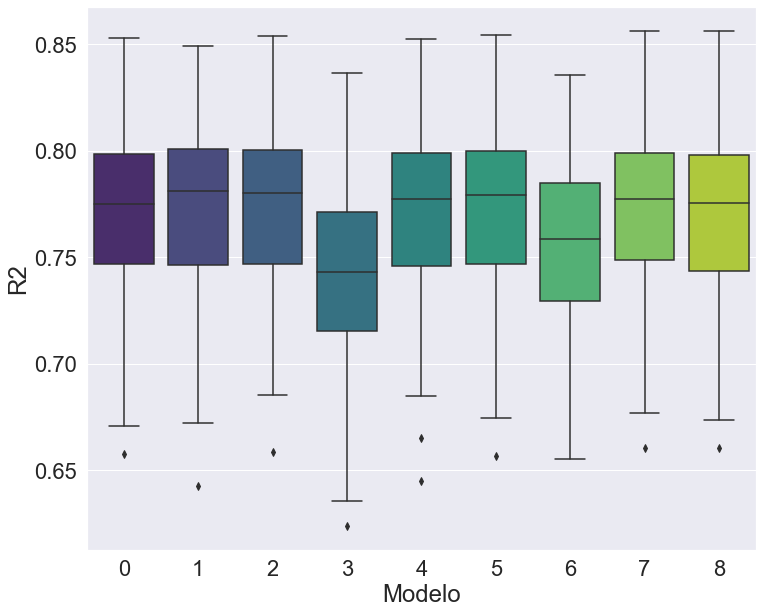

In [42]:
list_res = pd.DataFrame(map(lambda x: cross_val_lin(x,data_train, seed=2022),list_form))
results = list_res.T.melt()
results.columns = ['Modelo','R2']

sns.boxplot(x='Modelo',y='R2',data=results,palette='viridis');

Considero que podríamos seleccionar los 2 siguientes modelos :

- Modelo: ***fev ~ age + height + sex + age_height + age_sex + age_smoke  R2: 0.775*** 
- Modelo: ***fev ~ age + height + age_height + age + age_smoke R2: 0.774 ***

Debido a un R2 ligeramente mayor, seleccionaré el modelo  : **fev ~ age + height + sex + age_height + age_sex + age_smoke  R2: 0.775**

## 5- Comparación de ambos modelos por validación cruzada repetida. ¿Cuál de ellos tiene mejor comportamiento en generalización?
<a id="1.5"></a>

Procederemos a comparar los 2 mejores modelos de sin interacciones y con interacciones entre las variables : 

- Sin interacciones : **fev ~ height + age + sex R2 = 0.756**
- Con interacciones : **fev ~ age + height + sex + age_height + age_sex + age_smoke R2: 0.775**

In [43]:
sin_interacciones = 'fev ~ height + age + sex'
con_interacciones = 'fev ~ age + height + sex + age_height + age_sex + age_smoke'

list_form = [sin_interacciones,con_interacciones]

Modelo: fev ~ height + age + sex
Coeficiente de determinaciÃ³n R2: 0.756 (0.035)
Modelo: fev ~ age + height + sex + age_height + age_sex + age_smoke
Coeficiente de determinaciÃ³n R2: 0.775 (0.038)


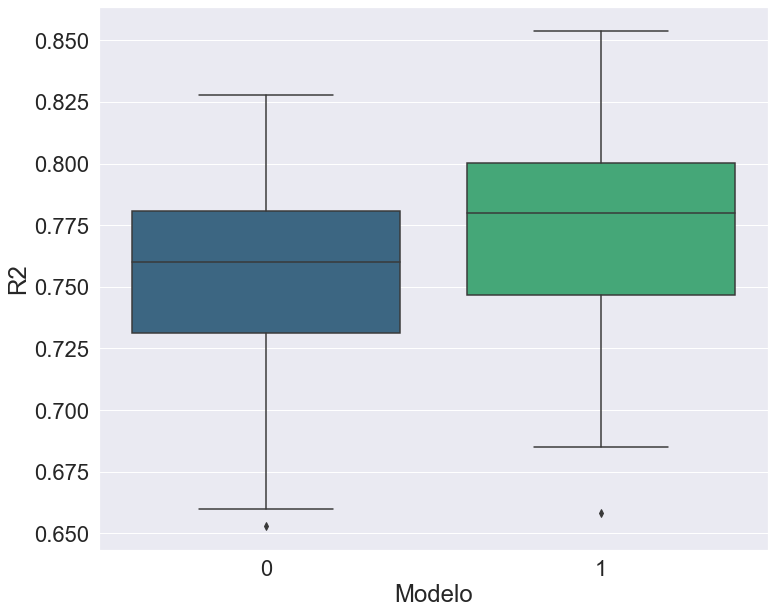

In [44]:
list_res = pd.DataFrame(map(lambda x: cross_val_lin(x,data_train, seed=2022),list_form))
results = list_res.T.melt()
results.columns = ['Modelo','R2']

sns.boxplot(x='Modelo',y='R2',data=results,palette='viridis');

El R2 es mayor con claridad en el modelo **con interacciones** entre las variables y tiene mejor comportamiento en generalización.

# Ejercicio 2
<a id="2"></a>
Con los datos de la serie de “defunciones.xlsx” que se encuentra en la carpeta de datos de la documentación, se pretende ajustar el mejor modelo de series temporales a cualquiera de las series allí contenidas (elige 1).

- [1- Lectura y representación de la serie. Descomposición. Conclusiones.](#2.1)
- [2- Partición training y test (los últimos 2 años de datos).](#2.2)
- [3- Mejor modelo de suavizado exponencial. ¿Pasa el test residual de Ljung.Box?](#2.3)
- [4- Mejor modelo ARIMA. ¿Pasa el test residual de Ljung.Box?](#2.4)
- [5- Comparación. En relación al MAPE en el conjunto de tets, ¿Qué modelo resulta más preciso en sus predicciones?](#2.5)

## 1- Lectura y representación de la serie. Descomposición. Conclusiones.
<a id="2.1"></a>

In [45]:
defunciones = pd.read_excel(r"C:\Users\cex\Desktop\Documentación minería de datos y modelización predictiva - Guillermo Villarino-20230428\Datos\defunciones.xlsx")
defunciones

Todas las causas  Tumores  Causas externas
0        1980M01             28681     4883             1277
1        1980M02             23906     4493             1122
2        1980M03             25275     4957             1244
3        1980M04             22500     4523             1214
4        1980M05             22781     4893             1228
..           ...               ...      ...              ...
463      2018M08             33177     9370             1472
464      2018M09             30293     9079             1306
465      2018M10             32879     9629             1275
466      2018M11             34338     9315             1234
467      2018M12             37033     9743             1268

[468 rows x 4 columns]

### Arreglar fecha

In [46]:
defunciones.drop(['Todas las causas','Tumores'],inplace=True,axis=1)
defunciones['Mes'] = defunciones.iloc[:,0].apply(lambda x : x.replace('M','-'))
defunciones.set_index('Mes',inplace=True)
defunciones.index=pd.to_datetime(defunciones.index)
defunciones = defunciones.drop([' '],axis=1)


Se utilizará la variable **causas externas** como indicado en las instrucciones de seleccionar solo 1 de las variables.

### Estudio descriptivo

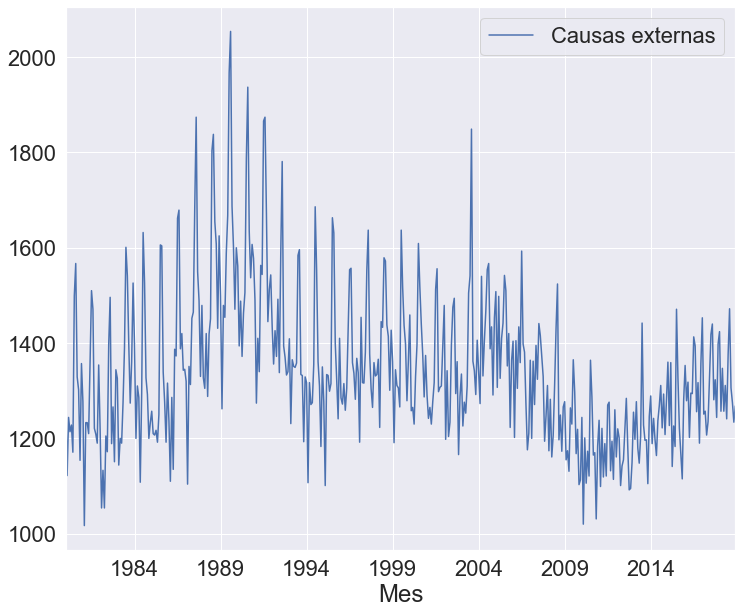

In [47]:
plt.rcParams["figure.figsize"] = (12,10)
defunciones.plot();


Observamos como hay tendencia y estacionalidad por lo tanto diferenciaremos para ajustar el mejor modelo posible de suavizamiento y ARIMA.

### Test Dickey Fuller

- H0: La serie NO es estacionaria

- H1: La serie es estacionaria

Un p-valor < 0.05 es lo que buscamos

In [48]:
test_stationarity(defunciones)

Results of Dickey-Fuller Test:
Test Statistic                  -1.882629
p-value                          0.340277
#Lags Used                      18.000000
Number of Observations Used    449.000000
Critical Value (1%)             -3.444998
Critical Value (5%)             -2.867999
Critical Value (10%)            -2.570210
dtype: float64


Nos encontramos un P-valor alto por lo tanto hace faltar **Descomponer** para ajustar el mejor modelo debido a que no podemos rechazar la hipótesis nula.

### Descomposición aditiva

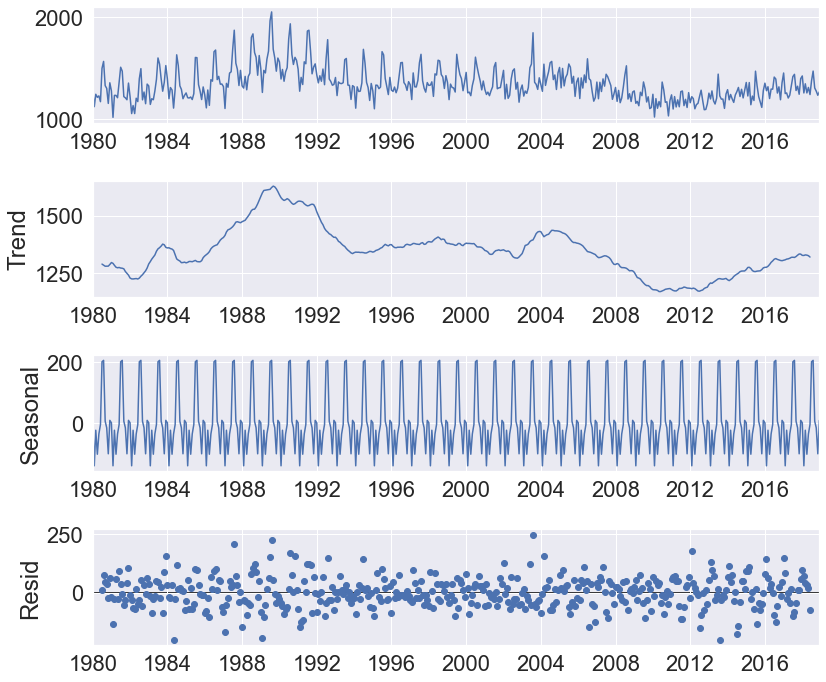

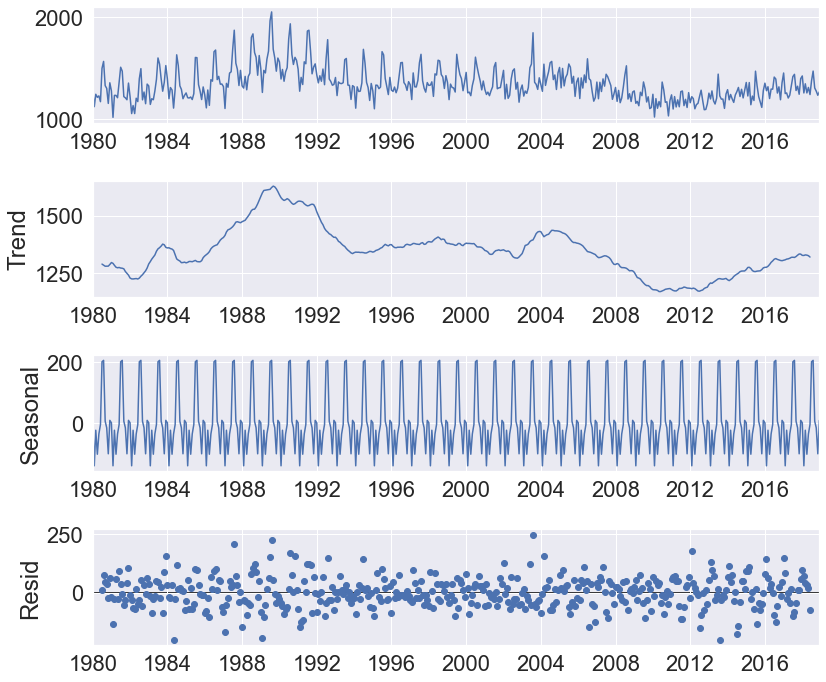

In [49]:
def_aditiva = seasonal_decompose(defunciones, model='additive',period=12)
def_aditiva.plot()

Una vez observado en orden la serie al natural, la serie de medias móviles , la serie de estacionalidad pura y el random procedemos a realizar el test de Dicky Fuller a los residuales de la descomposición aditiva :

In [50]:
test_stationarity(def_aditiva.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.378328e+00
p-value                        2.550119e-13
#Lags Used                     1.700000e+01
Number of Observations Used    4.380000e+02
Critical Value (1%)           -3.445368e+00
Critical Value (5%)           -2.868161e+00
Critical Value (10%)          -2.570297e+00
dtype: float64


### Descomposición multiplicativa

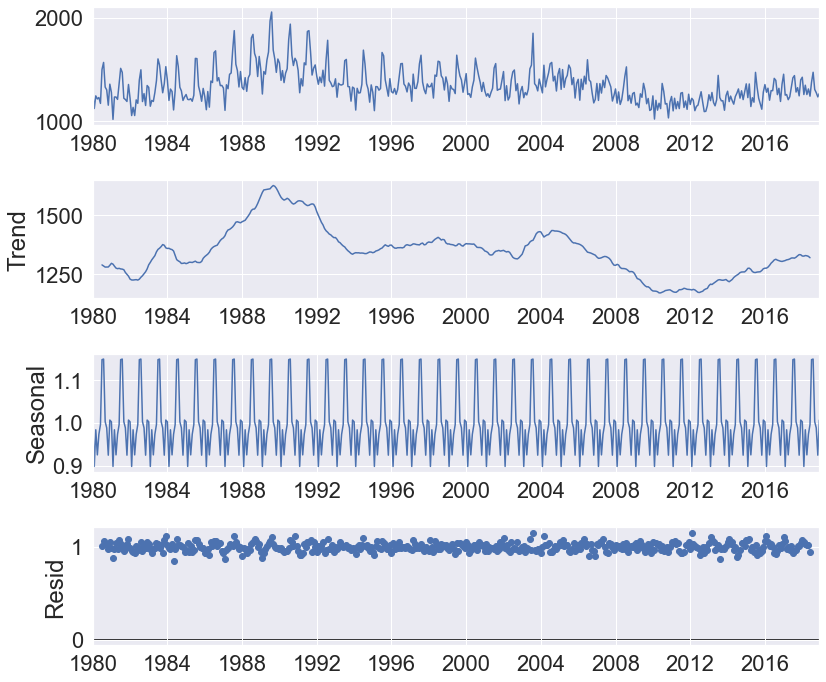

In [51]:
def_mul = seasonal_decompose(defunciones, model='multiplicative',period=12)
def_mul.plot()
plt.show()

Una vez observado en orden la serie al natural, la serie de medias móviles , la serie de estacionalidad pura y el random procedemos a realizar el test de Dicky Fuller a los residuales de la descomposición multiplicativa :

In [52]:
test_stationarity(def_mul.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.162076e+00
p-value                        2.950308e-10
#Lags Used                     1.700000e+01
Number of Observations Used    4.380000e+02
Critical Value (1%)           -3.445368e+00
Critical Value (5%)           -2.868161e+00
Critical Value (10%)          -2.570297e+00
dtype: float64


La estacionalidad de la serie no mejora con las descomposiciones por lo tanto prosigamos a transformar la serie en logarítmica y después con las diferenciaciones regular y estacional.

### Trasformacion Logaritimica

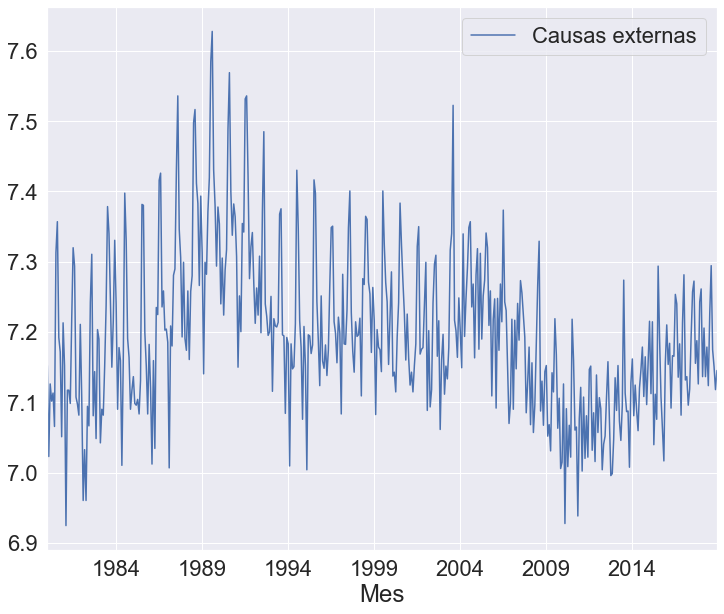

In [53]:
defLog = np.log(defunciones)
defLog.plot();

### Diferenciación regular

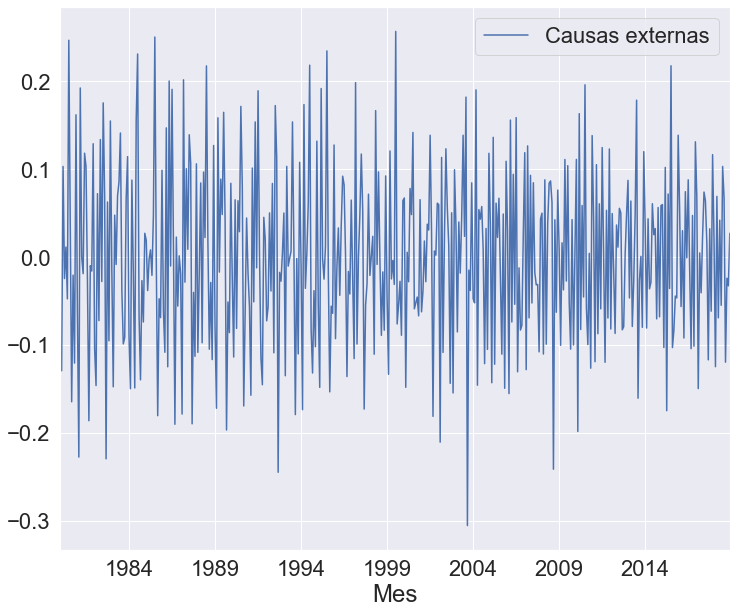

In [54]:
defLog_diff_1 = defLog.diff(periods=1)
defLog_diff_1.plot();

### Diferenciación estacional

<AxesSubplot:xlabel='Mes'>

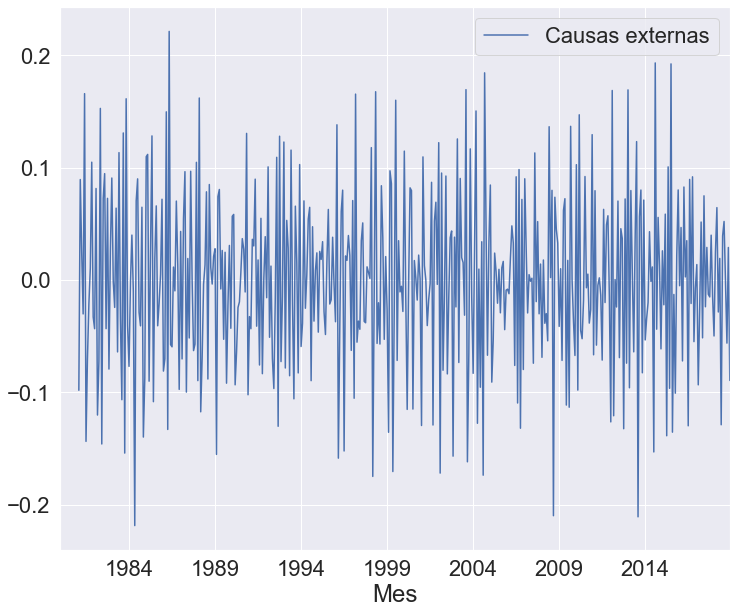

In [55]:
defLog_diff_1_12 = defLog_diff_1.diff(periods=12)
defLog_diff_1_12.plot()

In [56]:
test_stationarity(defLog_diff_1_12.dropna(inplace=False))

Results of Dickey-Fuller Test:
Test Statistic                -9.303868e+00
p-value                        1.094013e-15
#Lags Used                     1.300000e+01
Number of Observations Used    4.410000e+02
Critical Value (1%)           -3.445266e+00
Critical Value (5%)           -2.868116e+00
Critical Value (10%)          -2.570273e+00
dtype: float64


Ahora ya con un P-Valor mucho mejor para convertir la serie en estacioria.

## 2- Partición training y test (los últimos 2 años de datos)
<a id="2.2"></a>

In [57]:
defLog = defunciones.copy()
defLog['Causas externas'] = np.log(defLog['Causas externas'])
def_tr = defLog['1980-01-01':'2016-12-01']
def_tst = defLog['2017-01-01':]
print('Datos del training',def_tr.shape)
print('Datos del test',def_tst.shape)

Datos del training (444, 1)
Datos del test (24, 1)


## 3- Mejor modelo de suavizado exponencial. ¿Pasa el test residual de Ljung.Box?
<a id="2.3"></a>

### Suavizado de Winters Aditivo

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



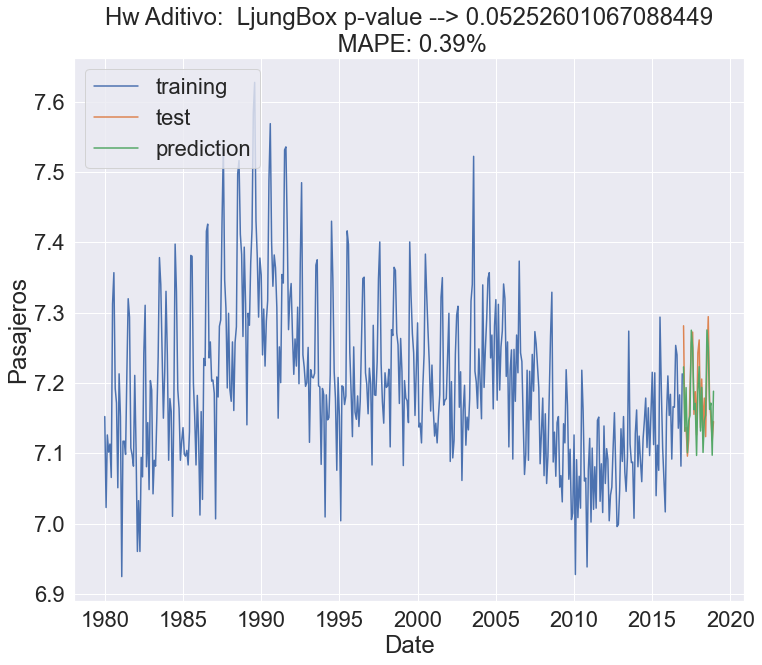

0.05252601067088449


In [58]:
hw_add = ets.ExponentialSmoothing(def_tr,trend='add', damped_trend=False, seasonal='add').fit()
eval_model(hw_add,def_tr,def_tst,'Hw Aditivo')

In [59]:
hw_add.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:          Causas externas   No. Observations:                  444
Model:             ExponentialSmoothing   SSE                              1.063
Optimized:                         True   AIC                          -2647.474
Trend:                         Additive   BIC                          -2581.941
Seasonal:                      Additive   AICC                         -2645.865
Seasonal Periods:                    12   Date:                 Thu, 29 Jun 2023
Box-Cox:                          False   Time:                         22:50:35
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2462206                alpha                 True
smoothing_trend              1.5049e-17                 beta                 True
smoothing_seasonal            0.1597153                gamma                 True
initial_level                 7.1616974                  l.0                 True
initial_trend                2.7526e-05                  b.0                 True
initial_seasons.0            -0.0091882                  s.0                 True
initial_seasons.1            -0.1497575                  s.1                 True
initial_seasons.2            -0.0468611                  s.2                 True
initial_seasons.3            -0.0806144                  s.3                 True
initial_seasons.4            -0.0414188                  s.4                 True
initial_seasons.5            -0.0093032                  s.5                 True
initial_seasons.6             0.1736376                  s.6                 True
initial_seasons.7             0.1878053                  s.7                 True
initial_seasons.8             0.0180027                  s.8                 True
initial_seasons.9            -0.0060003                  s.9                 True
initial_seasons.10           -0.0675238                 s.10                 True
initial_seasons.11            0.0402089                 s.11                 True
---------------------------------------------------------------------------------
"""

### Suavizado de Holt Winters Multiplicativo

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



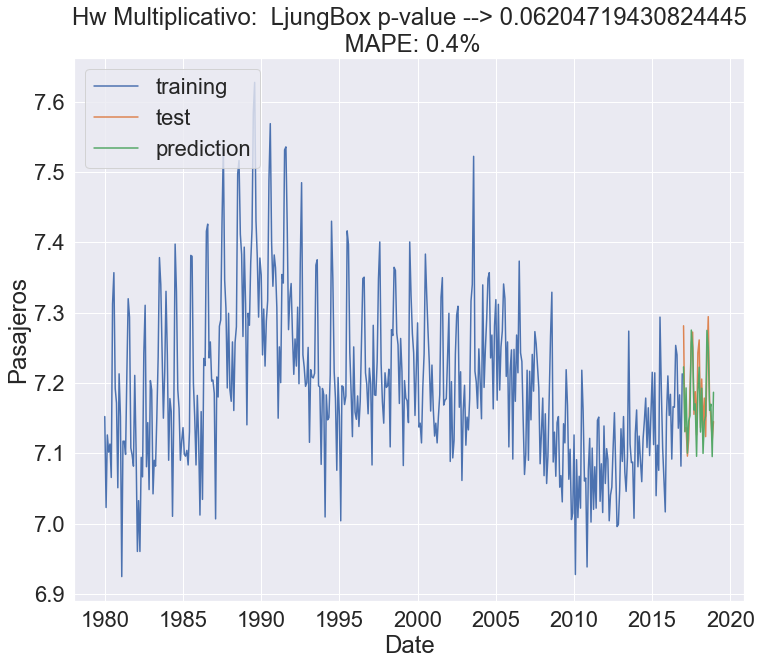

0.06204719430824445


In [60]:
hw_mul = ets.ExponentialSmoothing(def_tr,trend='mul', damped_trend=False, seasonal='mul').fit()
eval_model(hw_mul,def_tr,def_tst,'Hw Multiplicativo')

In [61]:
hw_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:          Causas externas   No. Observations:                  444
Model:             ExponentialSmoothing   SSE                              1.060
Optimized:                         True   AIC                          -2648.654
Trend:                   Multiplicative   BIC                          -2583.121
Seasonal:                Multiplicative   AICC                         -2647.044
Seasonal Periods:                    12   Date:                 Thu, 29 Jun 2023
Box-Cox:                          False   Time:                         22:50:35
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2475565                alpha                 True
smoothing_trend                0.000000                 beta                 True
smoothing_seasonal            0.1578114                gamma                 True
initial_level                 7.1530764                  l.0                 True
initial_trend                 0.9999953                  b.0                 True
initial_seasons.0             0.9999646                  s.0                 True
initial_seasons.1             0.9803956                  s.1                 True
initial_seasons.2             0.9946789                  s.2                 True
initial_seasons.3             0.9899718                  s.3                 True
initial_seasons.4             0.9953481                  s.4                 True
initial_seasons.5             0.9998831                  s.5                 True
initial_seasons.6             1.0254195                  s.6                 True
initial_seasons.7             1.0274117                  s.7                 True
initial_seasons.8             1.0038897                  s.8                 True
initial_seasons.9             1.0004262                  s.9                 True
initial_seasons.10            0.9918893                 s.10                 True
initial_seasons.11            1.0068223                 s.11                 True
---------------------------------------------------------------------------------
"""

### Conclusión

Ambos modelos pasan estadísticamente el test de LjungBox(Levemente, no significativo) y el error del MAPE es menor en el modelo de Winters Aditivo entonces lo seleccionaré como mejor modelo debido a que tiene un error ligeramente menor y ambos pasan el test de LjungBox.

## 4- Mejor modelo ARIMA. ¿Pasa el test residual de Ljung.Box?
<a id="2.4"></a>

### Autocorrelaciones
Para ajustar el mejor modelo ARIMA de forma manual es necesario evaluar las autocorelaciones para identificar efectos de AR y MA y proponer órdenes para el modelo.

- Utilizaremos **ACF** para observar la estacionalidad
- Utilizaremos **PACF** para el orden del modelo AR y MA.

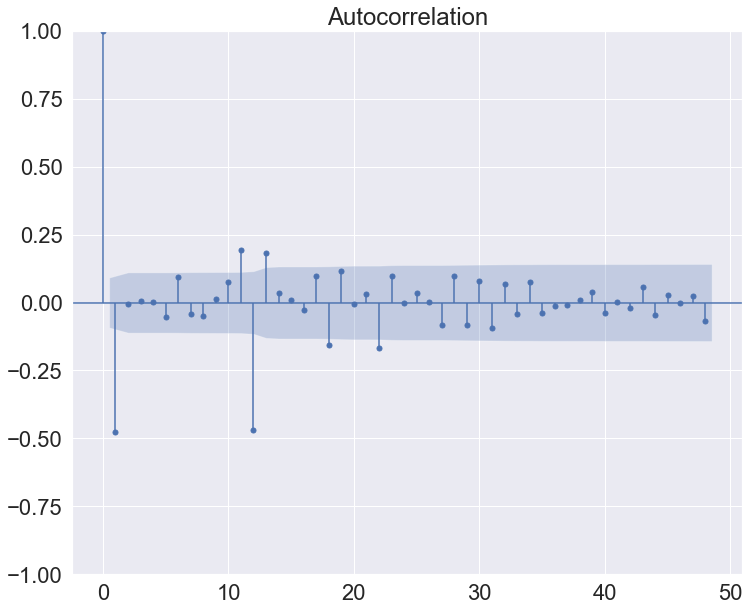

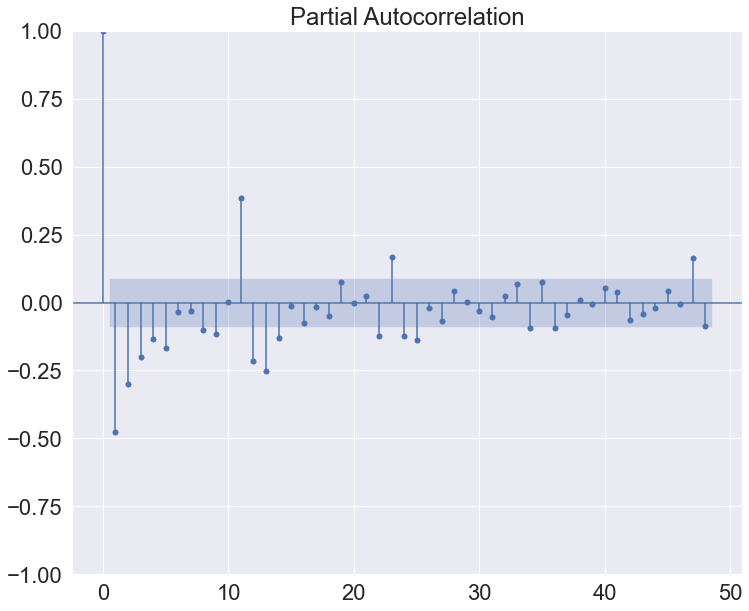

In [62]:
plot_acf(defLog_diff_1_12.dropna(inplace=False),lags=48)
plt.show()
plot_pacf(defLog_diff_1_12.dropna(inplace=False),lags=48,method='ywm')
plt.show()

Se observa que las funciones de autocorrelación (ACF) y autocorrelación parcial (ACFP) estimadas también validan los periodos estacionales porque los coeficientes de la ACF para retardos múltiplos del período estacional de la serie son significativamente distintos de cero.

Con varios retardos significativos especialmente en el retardo 12 la parte del MA(1) seria 1 e incluso se podrian hacer pruebas con ordenes superiores debido a los numerosos retardos significatvos

Recomendaría intentar con unos modelos de orden ARIMA(1,0,1)(1,0,1) o ARIMA(2,0,1)(1,0,1)

### Modelo  1 ARIMA(1,0,1)(1,0,1)

In [63]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
arima1 = SARIMAX(def_tr, 
                order = (1,0,1), 
                seasonal_order =(1,0,1, 12))
  
arima_1 = arima1.fit()
arima_1.summary()

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Causas externas   No. Observations:                  444
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 685.933
Date:                            Thu, 29 Jun 2023   AIC                          -1361.867
Time:                                    22:50:37   BIC                          -1341.388
Sample:                                01-01-1980   HQIC                         -1353.791
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   4.91e-05   2.04e+04      0.000       1.000       1.000
ma.L1         -0.7257      0.034    -21.126      0.000      -0.793      -0.658
ar.S.L12       0.9898      0.004    247.041      0.000       0.982       0.998
ma.S.L12      -0.7770      0.036    -21.617      0.000      -0.847      -0.707
sigma2         0.0025      0.000     16.272      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 6.49
Prob(Q):                              0.56   Prob(JB):                         0.04
Heteroskedasticity (H):               0.72   Skew:                             0.09
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

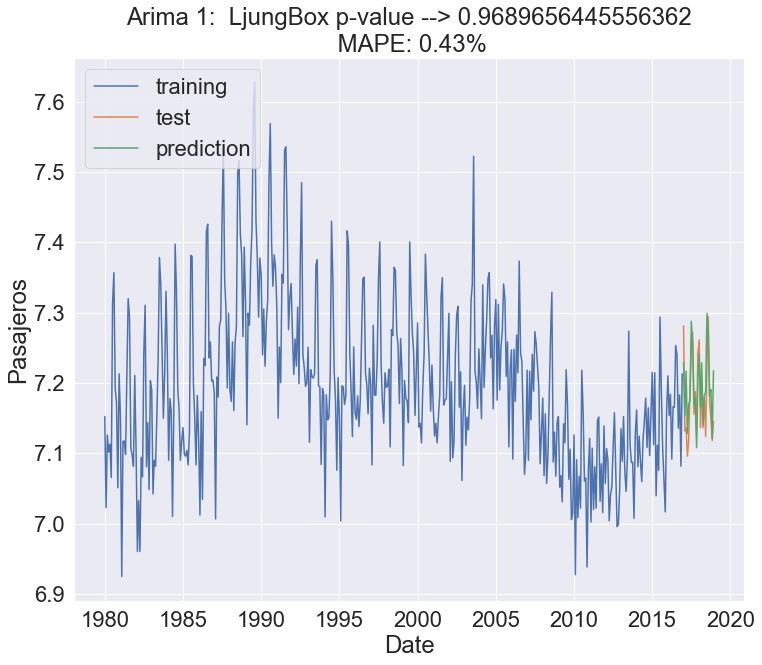

0.9689656445556362


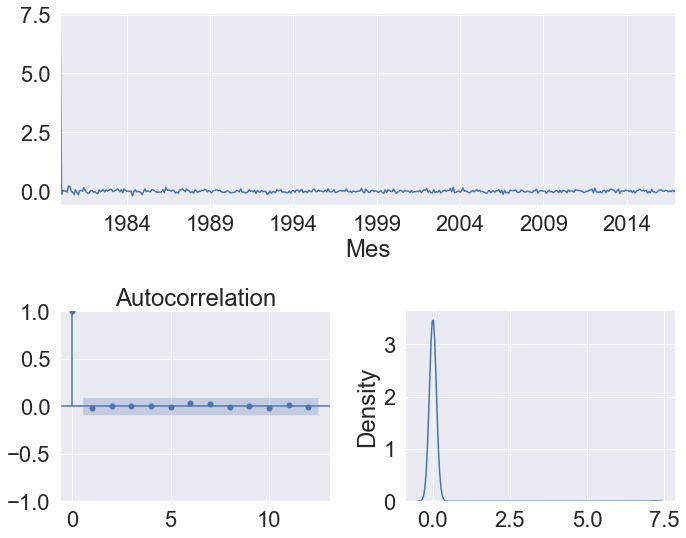

** Mean of the residuals:  0.02

** Ljung Box Test, p-value: 0.969 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot:xlabel='Mes'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:ylabel='Density'>)

In [64]:
eval_model(arima_1,def_tr,def_tst,'Arima 1')

residcheck(arima_1.resid,12)

### Modelo 2 ARIMA(2,0,1)(1,0,1)


In [65]:
arima2 = SARIMAX(def_tr, 
                order = (2, 0, 1), 
                seasonal_order =(1, 0, 1, 12))
  
arima_2 = arima2.fit()
arima_2.summary()

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

C:\Users\cex\anacondas\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Causas externas   No. Observations:                  444
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 686.165
Date:                            Thu, 29 Jun 2023   AIC                          -1360.330
Time:                                    22:50:39   BIC                          -1335.756
Sample:                                01-01-1980   HQIC                         -1350.639
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0766      0.051     20.986      0.000       0.976       1.177
ar.L2         -0.0766      0.051     -1.493      0.135      -0.177       0.024
ma.L1         -0.7763      0.037    -21.054      0.000      -0.849      -0.704
ar.S.L12       0.9908      0.004    268.548      0.000       0.984       0.998
ma.S.L12      -0.7954      0.035    -22.653      0.000      -0.864      -0.727
sigma2         0.0024      0.000     16.681      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.40
Prob(Q):                              0.95   Prob(JB):                         0.02
Heteroskedasticity (H):               0.73   Skew:                             0.10
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

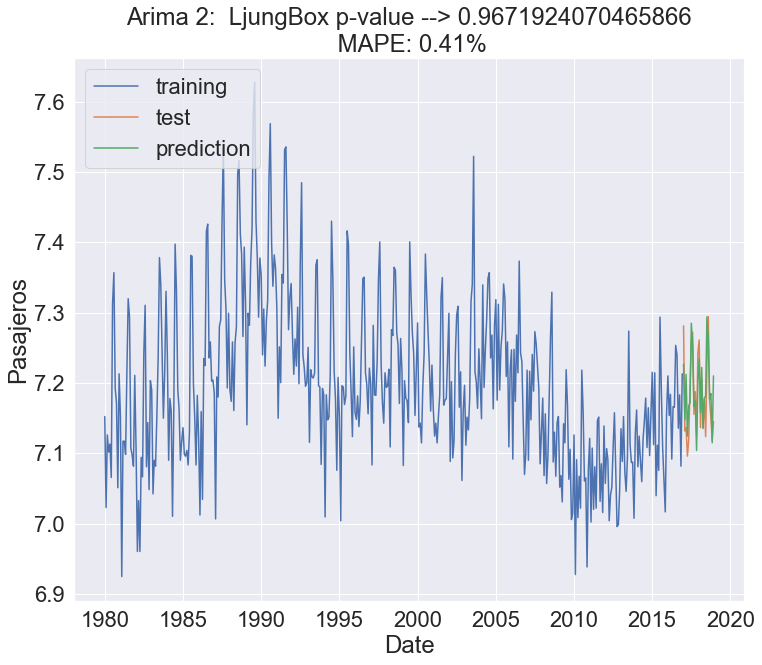

0.9671924070465866


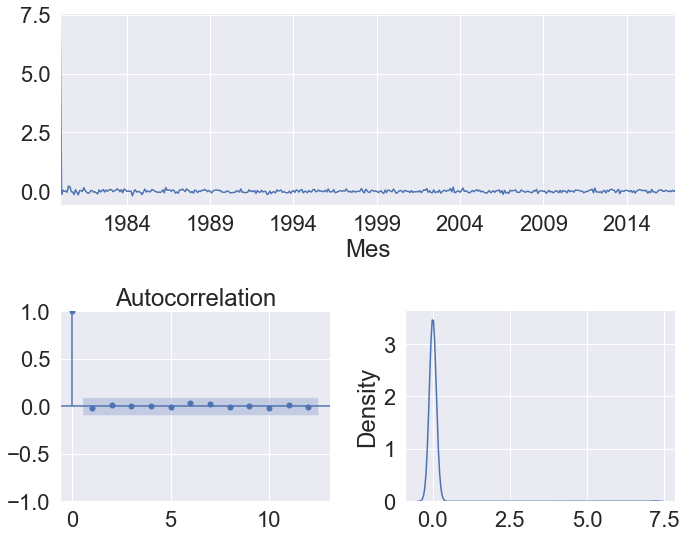

** Mean of the residuals:  0.02

** Ljung Box Test, p-value: 0.967 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot:xlabel='Mes'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:ylabel='Density'>)

In [66]:
eval_model(arima_2,def_tr,def_tst,'Arima 2')

residcheck(arima_2.resid,12)

Una vez ralizados los 2 modelos propuestos manuales, veamos que orden de soluciones propone el arima automático  :

### ARIMA Automático

-1360.330
Time:	23:30:34	BIC	-1335.756

In [67]:
import pmdarima as pm

# Ajustamos modelo arima step-wise con métrica AIC para la serie de vuelos
arima_auto = pm.auto_arima(def_tr, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      #start_P=None, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(arima_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-1198.902, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-648.497, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-1212.282, Time=0.94 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-993.393, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3014.855, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-868.027, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=-1232.620, Time=2.08 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=-1226.754, Time=2.10 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-1200.179, Time=1.16 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=-1165.443, Time=2.55 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=-1234.444, Time=2.66 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=-1210.236, Time=1.04 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=-1232.110, Time=2.64 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=-1169.370, Time=1.35 sec
 ARIMA(3,

In [68]:
arima3 = SARIMAX(def_tr, 
                order = (3, 0, 1), 
                seasonal_order =(1, 0, 1, 12))
  
arima_3 = arima3.fit()
arima_3.summary()

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

C:\Users\cex\anacondas\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Causas externas   No. Observations:                  444
Model:             SARIMAX(3, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 688.091
Date:                            Thu, 29 Jun 2023   AIC                          -1362.181
Time:                                    22:52:11   BIC                          -1333.510
Sample:                                01-01-1980   HQIC                         -1350.875
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1655      0.073     15.891      0.000       1.022       1.309
ar.L2         -0.0256      0.074     -0.344      0.731      -0.171       0.120
ar.L3         -0.1400      0.060     -2.327      0.020      -0.258      -0.022
ma.L1         -0.8431      0.046    -18.274      0.000      -0.933      -0.753
ar.S.L12       0.9959      0.002    481.378      0.000       0.992       1.000
ma.S.L12      -0.8232      0.032    -25.561      0.000      -0.886      -0.760
sigma2         0.0024      0.000     15.374      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 3.38
Prob(Q):                              0.68   Prob(JB):                         0.18
Heteroskedasticity (H):               0.78   Skew:                             0.08
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

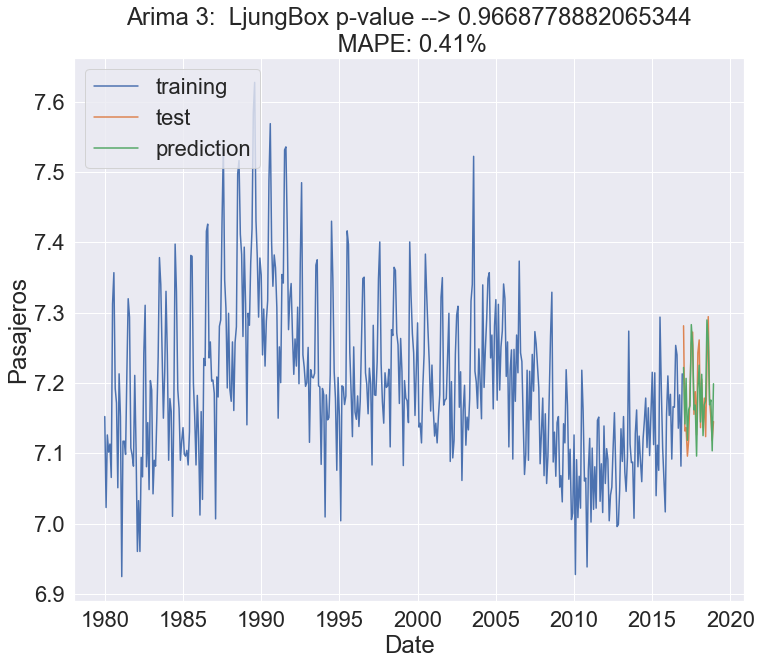

0.9668778882065344


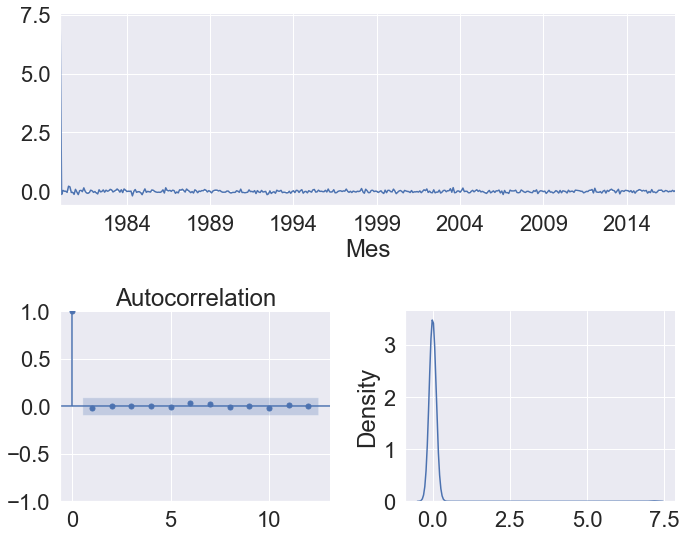

** Mean of the residuals:  0.02

** Ljung Box Test, p-value: 0.967 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot:xlabel='Mes'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:ylabel='Density'>)

In [69]:
eval_model(arima_3,def_tr,def_tst,'Arima 3')

residcheck(arima_3.resid,12)

### Conclusión

Tanto el modelo manual ARIMA(2,0,1)(1,0,1) como el modelo del ARIMA Automático ARIMA(3,0,1)(1,0,1) tienen un MAPE de 0.41 y ambos pasan el test de LjungBox, sin embargo debido a unos valores menores de BIC y AIC seleccionaré el modelo propuesto por el ARIMA Automático,es decir el (3,0,1)(1,0,1).

## 5- Comparación. En relación al MAPE en el conjunto de tets, ¿Qué modelo resulta más preciso en sus predicciones?
<a id="2.5"></a>

**Modelo Suavizado**

C:\Users\cex\anacondas\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



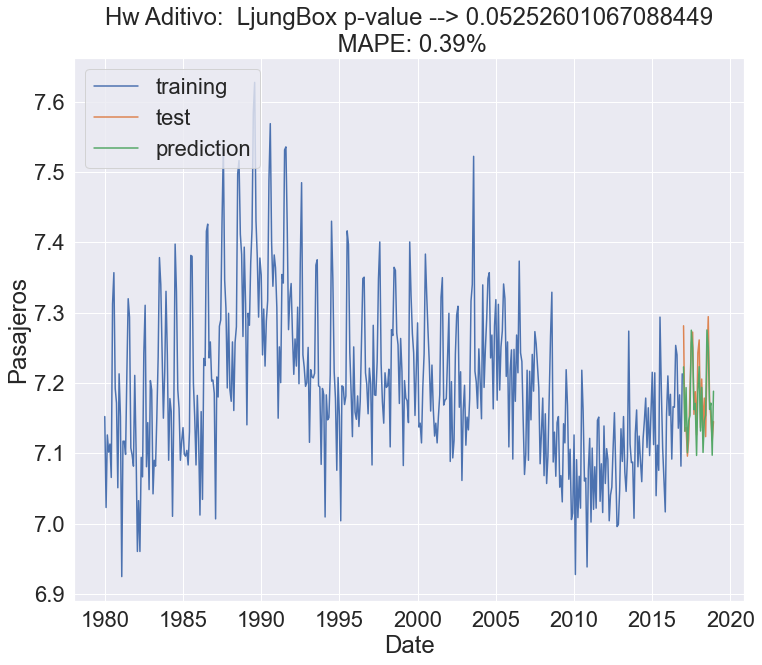

0.05252601067088449


In [70]:
hw_add = ets.ExponentialSmoothing(def_tr,trend='add', damped_trend=False, seasonal='add').fit()
eval_model(hw_add,def_tr,def_tst,'Hw Aditivo')

**Modelo ARIMA**

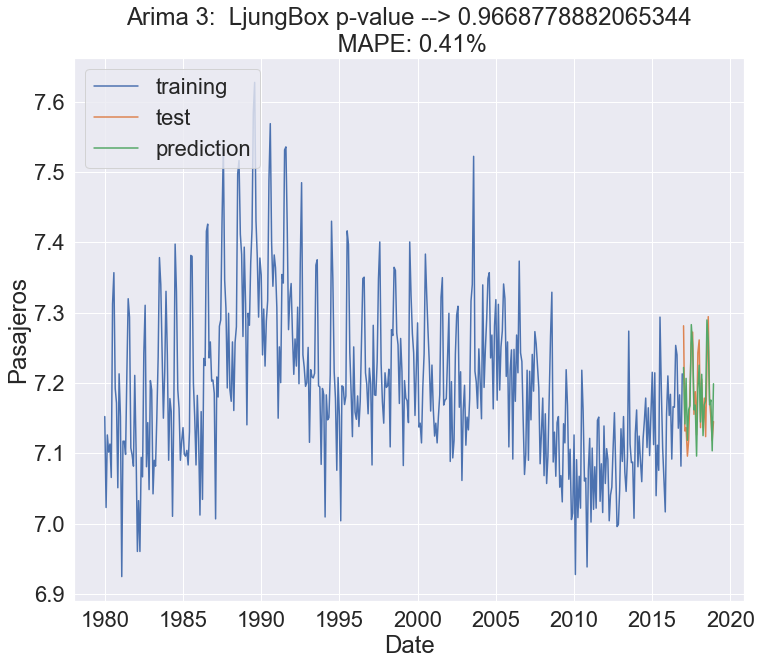

0.9668778882065344


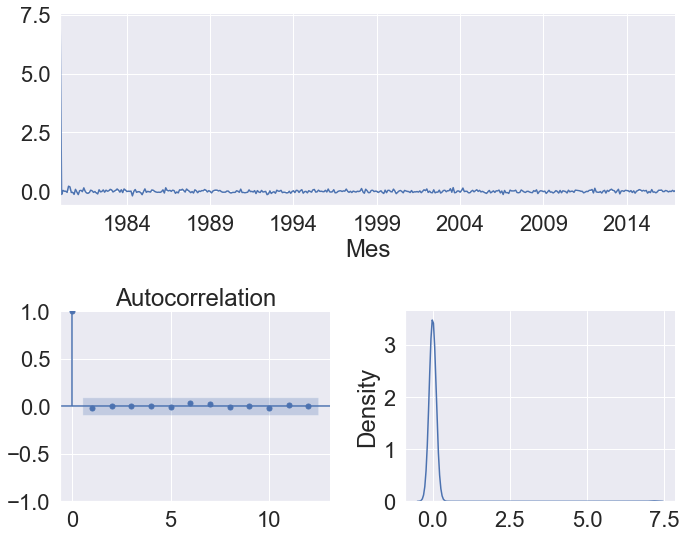

** Mean of the residuals:  0.02

** Ljung Box Test, p-value: 0.967 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


In [71]:
eval_model(arima_3,def_tr,def_tst,'Arima 3')

residcheck(arima_3.resid,12);

El modelo que resulta más preciso de acuerdo al MAPE es el modelo de suavizado de Winters Aditivo con un MAPE de 0.39%

# Ejercicio 3
<a id="3"></a>

- [1- Leer el archivo](#3.1)

- [2- Obtener la matriz de correlaciones entre las variables numéricas. Conclusiones.](#3.2)

- [3- Sabiendo que se trata de predecir la variable binaria diagnosis (‘M,’B’). ¿Cuál sería el modelo adecuado de predicción? ¿Qué problemas auguras a la luz de la información sobre las correlaciones del archivo?](#3.3)

- [4- Como posible estrategia se plantea la realización de un ACP para la reducción de dimensiones y un modelo de predicción adecuado utilizando como predictores las componentes principales resultantes de tal forma que se retenga al menos el 70% de la variabilidad del archivo.](#3.4)
    - [a. Valora la adecuación muestral a priori](#3.4.1)
    - [b. Realiza el ACP sobre las numéricas. ¿Cuántas componentes se deberían considerar para cumplir el criterio mencionado? Interpreta la componente 1.](#3.4.2)
    - [c. Crea el input con estas componentes (matriz de scores o puntuaciones) y ajusta un modelo de predicción adecuado para la variable objetivo diagnosis.](#3.4.3)
    - [d. Conclusiones del modelo por validación cruzada repetida. Interpreta el parámetro de la componente 1.](#3.4.4)



In [72]:
#PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

#Factor Analysis
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Encoding
from sklearn.preprocessing import LabelEncoder
# Biplot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from psynlig import (
    pca_explained_variance,
    pca_residual_variance,
    pca_explained_variance_bar,
    pca_explained_variance_pie,
    pca_1d_loadings,
    pca_2d_loadings,
    pca_2d_scores
)

# Statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.formula.api import logit

# Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 1- Leer el archivo
<a id="3.1"></a>

In [73]:
df = pd.read_excel(r"C:\Users\cex\Desktop\Documentación minería de datos y modelización predictiva - Guillermo Villarino-20230428\Datos\wisconsin.xlsx")
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

## 2- Matriz de correlaciones
<a id="3.2"></a>

In [74]:
correalaciones = df.corr()
correalaciones.style.background_gradient(cmap='coolwarm').format(precision=3)

Se observa una matriz de correlacion colorida con correlaciones altas tanto positivas como negativas donde todas las variables parecen estar relacionadas entre si al tener correlaciones es decir no hay pares de variables que se relacionan aisladamente, por lo tanto es recomendable seguir con componentes principales debido a que habra redución de las variables, en conclusion los datos de entrada tienen una estructura de correlacion potente.


## 3- Sabiendo que se trata de predecir la variable binaria diagnosis (‘M,’B’). ¿Cuál sería el modelo adecuado de predicción? ¿Qué problemas auguras a la luz de la información sobre las correlaciones del archivo?
<a id="3.3"></a>

Dado que la variable objetivo diagnosis se tratan 2 clases M o B(Binario), el modelo de prediccion adecuado son los modelos de clasificacion(Para este ejercicio la regresion logistica). Al revelar la matriz de correlaciones que las variables poseen una estructura de correlacion potente, es decir, estan muy correlacionadas entre si (Multicolinealidad)el efecto de cada una en el modelo de regresion se vuelve menos preciso, es decir resulta muy difícil controlar los coeficientes y los intervalos de confianza en el modelo de regresión logística.

## 4- Como posible estrategia se plantea la realización de un ACP para la reducción de dimensiones y un modelo de predicción adecuado utilizando como predictores las componentes principales resultantes de tal forma que se retenga al menos el 70% de la variabilidad del archivo.
<a id="3.4"></a>

### a. Valora la adecuación muestral a priori<a id="3.4.1"></a>
Una vez realizado e analizado la matriz de correlaciones, prosigamos con el test de esferidad de Bartlett y KMO-MSA global y por variable.

#### Test de Bartlett

In [75]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(df.drop(['id','diagnosis'],axis=1))

(39362.12084113342, 0.0)

Con un valor estadístico alto y un p-valor bajo se rechaza la hipótesis nula por lo tanto pasa el test.

#### KMO-MSA global y por variable

In [76]:
from factor_analyzer.factor_analyzer import calculate_kmo
calculate_kmo(df.drop(['id','diagnosis'],axis=1))

C:\Users\cex\anacondas\lib\site-packages\factor_analyzer\utils.py:244: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



(array([0.83463512, 0.64352613, 0.85334054, 0.86403253, 0.814716  ,
        0.87939755, 0.89192843, 0.90027723, 0.82510264, 0.83181381,
        0.83412178, 0.48458942, 0.84290718, 0.85199881, 0.64427854,
        0.8712978 , 0.82547994, 0.83516673, 0.5832182 , 0.81149623,
        0.82308704, 0.60329755, 0.88493799, 0.82044529, 0.75316064,
        0.85127714, 0.90222587, 0.89105242, 0.69074764, 0.81233969]),
 0.8322253094661339)

Se buscaban obtener valores mayores a 0.5 y se ha conseguido no solo en el KMO total(0.83322) si no que el valor mínimo es 0.48458942 en una de las variables muy cerca del umbral establecido.

### b. Realiza el ACP sobre las numéricas. ¿Cuántas componentes se deberían considerar para cumplir el criterio mencionado? Interpreta la componente 1.
<a id="3.4.2"></a>

In [77]:
scaler = StandardScaler()
scaler.fit(df.drop(['id','diagnosis'],axis=1))
X = scaler.transform(df.drop(['id','diagnosis'],axis=1))
scores = pd.DataFrame(X,columns=list(df.drop(['id','diagnosis'],axis=1).columns))
scores

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  2.255747  ...      1.886690      -1.359293   
1                 -0.868652  ...      1.805927      -0.369203   
2                 -0.398008  ...      1.511870      -0.023974   
3                  4.910919  ...     -0.281464       0.133984   
4                 -0.562450  ...      1.298575      -1.466770   
..                      ...  ...           ...            ...   
564               -0.931027  ...      1.901185       0.117700   
565               -1.058611  ...      1.536720       2.047399   
566               -0.895587  ...      0.561361       1.374854   
567                1.043695  ...      1.961239       2.237926   
568               -0.561032  ...     -1.410893       0.764190   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           2.303601    2.001237          1.307686           2.616665   
1           1.535126    1.890489         -0.375612          -0.430444   
2           1.347475    1.456285          0.527407           1.082932   
3          -0.249939   -0.550021          3.394275           3.893397   
4           1.338539    1.220724          0.220556          -0.313395   
..               ...         ...               ...                ...   
564         1.752563    2.015301          0.378365          -0.273318   
565         1.421940    1.494959         -0.691230          -0.394820   
566         0.579001    0.427906         -0.809587           0.350735   
567         2.303601    1.653171          1.430427           3.904848   
568        -1.432735   -1.075813         -1.859019          -1.207552   

     concavity_worst  concave points_worst  symmetry_worst  \
0           2.109526              2.296076        2.750622   
1          -0.146749              1.087084       -0.243890   
2           0.854974              1.955000        1.152255   
3           1.989588              2.175786        6.046041   
4           0.613179              0.729259       -0.868353   
..               ...                   ...             ...   
564         0.664512              1.629151       -1

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [70.0%] explained variance using the [30] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [70.00%] explained variance.
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


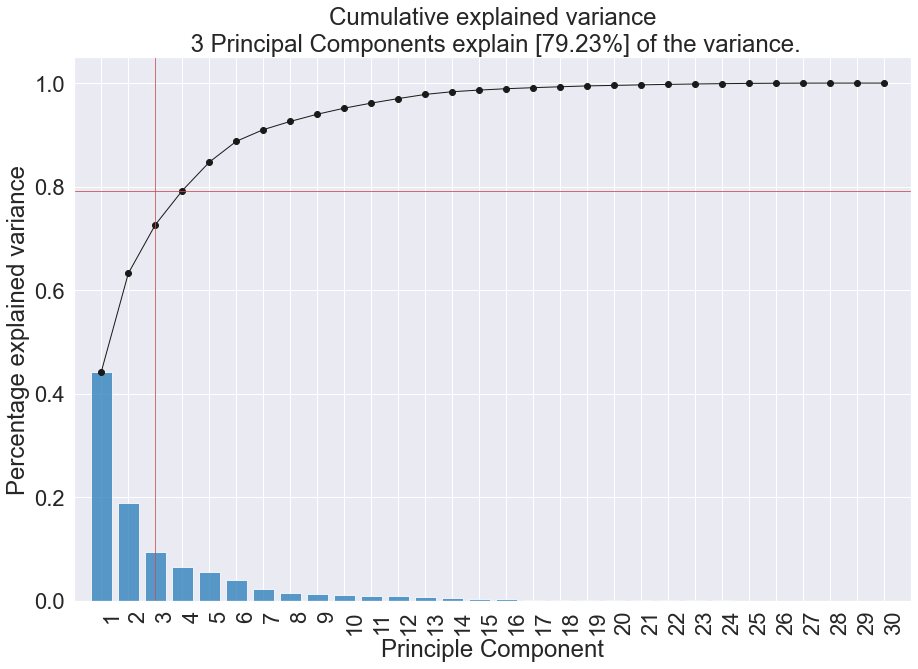

In [78]:
# Load library
from pca import pca

# Initialize pca with default parameters
model = pca(normalize=True,n_components = 0.7);

# Fit transform
results = model.fit_transform(df.drop(['id','diagnosis'],axis=1))

# Plot the explained variance
model.plot();


Para mantener el criterio inicial de retener al menos 70% de variabilidad en el archivo,  se deberian mantener 3 componentes como mostrado en el grafico. La componente 1 presenta alrededor de un 40% de variabilidad explicada y dentro de los ejes de coordenadas 3D, es la línea que mejor explica la forma de los puntos.

### c. Crea el input con estas componentes (matriz de scores o puntuaciones) y ajusta un modelo de predicción adecuado para la variable objetivo diagnosis.
<a id="3.4.3"></a>

Empezemos por depurar un poco los datos reemplazando las clases de M y B por 0 y 1.

In [79]:
# Reemplazando los 0 por 1.
df['diagnosis'].replace({'M': 0, 'B': 1},inplace=True);

In [80]:
pca = PCA(n_components=3)
scores = pca.fit_transform(X)
new_df = pd.DataFrame(scores,columns=['PC1','PC2','PC3'])
new_df

PC1        PC2       PC3
0     9.192837   1.948583 -1.123165
1     2.387802  -3.768171 -0.529296
2     5.733896  -1.075174 -0.551748
3     7.122953  10.275589 -3.232789
4     3.935302  -1.948071  1.389764
..         ...        ...       ...
564   6.439315  -3.576817  2.459484
565   3.793382  -3.584048  2.088477
566   1.256179  -1.902297  0.562730
567  10.374794   1.672010 -1.877030
568  -5.475243  -0.670636  1.490441

[569 rows x 3 columns]

In [81]:
new_df = new_df.join(df.diagnosis)
new_df

PC1        PC2       PC3  diagnosis
0     9.192837   1.948583 -1.123165          0
1     2.387802  -3.768171 -0.529296          0
2     5.733896  -1.075174 -0.551748          0
3     7.122953  10.275589 -3.232789          0
4     3.935302  -1.948071  1.389764          0
..         ...        ...       ...        ...
564   6.439315  -3.576817  2.459484          0
565   3.793382  -3.584048  2.088477          0
566   1.256179  -1.902297  0.562730          0
567  10.374794   1.672010 -1.877030          0
568  -5.475243  -0.670636  1.490441          1

[569 rows x 4 columns]

In [82]:
imputDep = new_df.drop('diagnosis',axis=1)
varObjBin = new_df.diagnosis

#### Partición training test

In [83]:
X_train, X_test, y_train, y_test = train_test_split(imputDep, varObjBin, test_size=0.2, random_state=1234)
print('Training dataset shape: ', X_train.shape, y_train.shape)
print('Test dataset: ',X_test.shape, y_test.shape)

Training dataset shape:  (455, 3) (455,)
Test dataset:  (114, 3) (114,)


## Modelo completo de referencia

In [84]:
data_train = X_train.join(y_train.astype('int64'))

In [85]:
formC=ols_formula(data_train,'diagnosis')
formC

'diagnosis ~ PC1 + PC2 + PC3'

In [86]:
modeloCompleto = logit(formC,data=data_train).fit()
modeloCompleto.summary()


Optimization terminated successfully.
         Current function value: 0.081726
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      451
Method:                           MLE   Df Model:                            3
Date:                Thu, 29 Jun 2023   Pseudo R-squ.:                  0.8757
Time:                        22:52:15   Log-Likelihood:                -37.185
converged:                       True   LL-Null:                       -299.10
Covariance Type:            nonrobust   LLR p-value:                3.276e-113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1188      0.342      3.271      0.001       0.448       1.789
PC1           -2.9671      0.520     -5.709      0.000      -3.986      -1.948
PC2            1.4898      0.306      4.861      0.000       0.889       2.090
PC3            0.5897      0.171      3.448      0.001       0.255       0.925
==============================================================================

Possibly complete quasi-separation: A fraction 0.44 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Analizamos las estadisticas de nuestro modelo de referencia de regresion

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
modelo = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='none')
y_predict = modelo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        45
           1       0.88      0.97      0.92        69

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114

[[36  9]
 [ 2 67]]


### d. Conclusiones del modelo por validación cruzada repetida. Interpreta el parámetro de la componente 1.
<a id="3.4.4"></a>

In [88]:
form1 = 'diagnosis ~ PC1'
form2 = 'diagnosis ~ PC1 + PC2'
form3 = 'diagnosis ~ PC1 + PC3'
form4 = 'diagnosis ~ PC2 + PC3'

In [89]:
list_form = [formC,form1,form2,form3,form4]
list_res = pd.DataFrame(map(lambda x: cross_val_log(x,data_train, seed=2022),list_form))

Modelo: diagnosis ~ PC1 + PC2 + PC3
AUC: 0.995 (0.004)
Modelo: diagnosis ~ PC1
AUC: 0.979 (0.011)
Modelo: diagnosis ~ PC1 + PC2
AUC: 0.993 (0.005)
Modelo: diagnosis ~ PC1 + PC3
AUC: 0.980 (0.011)
Modelo: diagnosis ~ PC2 + PC3
AUC: 0.656 (0.054)


El mejor modelo seria el modelo de referencia con un AUC de 0.995, también se podria seleccionar el 3 modelo PC1 + PC2 que tiene casi el mismo AUC y es menos complejo al tener una componente menos.

In [90]:
formC=ols_formula(data_train,'diagnosis')
model = logit(formC,data=data_train).fit()
np.exp(model.params)

Optimization terminated successfully.
         Current function value: 0.081726
         Iterations 11


Intercept    3.061123
PC1          0.051455
PC2          4.436281
PC3          1.803514
dtype: float64

Dado el parámetro PC1, podemos observar como al aumentar su valor, aumenta la probabilidad de diagnosis y al aumentar PC2 y PC3 la probabilidad de no diagnosis aumenta en 4.436280 y 1.803514.

# Ejercicio 4 
<a id="4"></a>
El conjunto de datos DatosEleccionesEspaña.xlsx contiene información demográfica sobre los distintos municipios de España junto con los resultados que se obtuvieron en un proceso electoral. En esta práctica, el objetivo fundamental es crear grupos de comunidades autónomas en función de ciertas características previamente seleccionadas.

- [1- Escoge 10 variables numéricas presentes en el conjunto de datos y realiza un ligera depuración sobre este subconjunto de variables (Valores raros, Outliers, NAs..)](#4.1)
- [2- Agrega los valores por CCAA, distinguiendo entre valores relativos (agregación por la media) y valores absolutos (agregación por suma)](#4.2)
- [3- Valora la necesidad de escalar los datos y decide el tipo de distancia a aplicar](#4.3)
- [4- Explora los métodos de clustering jerárquico para estos datos y decide el tipo de Linkage más adecuado.](#4.4)
- [5- Toma una decisión sobre el número de clusters a considerar y realiza un análisis cluster mediante el método k-means.](#4.5)

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
# N.CLusters
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from time import time
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import calinski_harabasz_score

from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import calinski_harabasz_score

def scree_plot_kmeans(data,n_max):
  range_n_clusters = range(2, n_max)
  inertias = []
  silhouette = []
  chindex = []
  var_perc = []
  
  for n_clusters in range_n_clusters:
      modelo_kmeans = KMeans(
                          n_clusters   = n_clusters, 
                          n_init       = 20, 
                          random_state = 123
                      )
      modelo_kmeans.fit(data)
      cluster_labels = modelo_kmeans.fit_predict(data)
      inertias.append(modelo_kmeans.inertia_)
      silhouette.append(silhouette_score(data, cluster_labels))
      chindex.append(calinski_harabasz_score(data, cluster_labels))
      tss = sum(pdist(data)**2)/data.shape[0]
      bss = tss - modelo_kmeans.inertia_
      var_perc.append(bss/tss*100)
      
  fig, ax = plt.subplots(1, 3, figsize=(20,5))
  ax[0].plot(range_n_clusters, inertias, marker='o')
  ax[0].set_title("Screet plot Varianza intra")
  ax[0].set_xlabel('Número clusters')
  ax[0].set_ylabel('Intra-cluster (inertia)')
  
  ax[1].plot(range_n_clusters, silhouette, marker='o')
  ax[1].set_title("Screet plot silhouette")
  ax[1].set_xlabel('Número clusters')
  ax[1].set_ylabel('Media índices silhouette');

  ax[2].plot(range_n_clusters, var_perc, marker='o')
  ax[2].set_title("Screet plot % Varianza")
  ax[2].set_xlabel('Número clusters')
  ax[2].set_ylabel('% de varianza explicada')


In [92]:
df = pd.read_excel(r"C:\Users\cex\Desktop\Documentación minería de datos y modelización predictiva - Guillermo Villarino-20230428\Datos\DatosEleccionesEspaña.xlsx")
df.head()

Name  CodigoProvincia         CCAA  Population  TotalCensus  \
0    Abadía               10  Extremadura         336          282   
1  Abertura               10  Extremadura         429          364   
2     Acebo               10  Extremadura         569          569   
3  Acehúche               10  Extremadura         822          704   
4  Aceituna               10  Extremadura         623          540   

   AbstentionPtge  AbstencionAlta  Izda_Pct  Dcha_Pct  Otros_Pct  Izquierda  \
0          20.213               0    60.444    35.555      1.778          1   
1          25.275               0    54.779    44.118      0.368          1   
2          27.241               0    44.203    53.140      0.966          0   
3          30.114               1    50.813    45.325      0.000          1   
4          30.185               1    44.562    49.867      0.796          0   

   Derecha  Age_0-4_Ptge  Age_under19_Ptge  Age_19_65_pct  Age_over65_pct  \
0        0         3.869            18.155         55.059          26.785   
1        0         1.632            13.055         56.643          30.304   
2        1         1.230             9.139         54.834          36.028   
3        0         4.258            14.964         60.098          24.940   
4        1         3.531            15.569         59.391          25.042   

   WomanPopulationPtge  ForeignersPtge  SameComAutonPtge  \
0               44.048            0.89            79.762   
1               50.117            1.63            90.909   
2               49.033            0.70            78.910   
3               51.095            0.12            93.917   
4               48.154            0.64            93.258   

   SameComAutonDiffProvPtge  DifComAutonPtge  UnemployLess25_Ptge  \
0                     0.298           19.345                2.381   
1                     2.797            7.226               16.216   
2                     0.703           18.102                8.197   
3                     0.487            5.109                7.407   
4                     0.161            4.173               15.385   

   Unemploy25_40_Ptge  UnemployMore40_Ptge  AgricultureUnemploymentPtge  \
0              54.762               42.857                        4.762   
1              32.432               51.351                        8.108   
2              36.066               55.738                       22.951   
3              61.111               31.481                       16.667   
4              48.077               36.538                       21.154   

   IndustryUnemploymentPtge  ConstructionUnemploymentPtge  \
0                     9.524                        11.905   
1                     8.108                        10.811   
2                     9.836                        13.115   
3                     5.556                        16.667   
4                     0.000                        11.538   

   ServicesUnemploymentPtge  totalEmpresas  Industria  Construccion  \
0                    73.810           15.0        0.0           0.0   
1                    67.568           11.0        0.0           0.0   
2                    49.180           49.0        0.0           0.0   
3                    59.259           50.0        0.0           0.0   
4                    61.538           22.0        0.0           0.0   

   ComercTTEHosteleria  Servicios ActividadPpal  inmuebles  Pob2010  \
0                  0.0        0.0          Otro      216.0    326.0   
1                  0.0        0.0          Otro      382.0    459.0   
2                  0.0        0.0          Otro      918.0    674.0   
3                  0.0        0.0          Otro      599.0    842.0   
4                  0.0        0.0          Otro      394.0    625.0   

   SUPERFICIE Densidad  PobChange_pct  PersonasInmueble  Explotaciones  
0   4507.5593  MuyBaja           3.07              1.56             28  
1   6270.7646  MuyBaja          -6.54              1.1

## 1- Escoge 10 variables numéricas presentes en el conjunto de datos y realiza un ligera depuración sobre este subconjunto de variables (Valores raros, Outliers, NAs)
<a id="4.1"></a>

In [93]:
df.columns

Index(['Name', 'CodigoProvincia', 'CCAA', 'Population', 'TotalCensus',
       'AbstentionPtge', 'AbstencionAlta', 'Izda_Pct', 'Dcha_Pct', 'Otros_Pct',
       'Izquierda', 'Derecha', 'Age_0-4_Ptge', 'Age_under19_Ptge',
       'Age_19_65_pct', 'Age_over65_pct', 'WomanPopulationPtge',
       'ForeignersPtge', 'SameComAutonPtge', 'SameComAutonDiffProvPtge',
       'DifComAutonPtge', 'UnemployLess25_Ptge', 'Unemploy25_40_Ptge',
       'UnemployMore40_Ptge', 'AgricultureUnemploymentPtge',
       'IndustryUnemploymentPtge', 'ConstructionUnemploymentPtge',
       'ServicesUnemploymentPtge', 'totalEmpresas', 'Industria',
       'Construccion', 'ComercTTEHosteleria', 'Servicios', 'ActividadPpal',
       'inmuebles', 'Pob2010', 'SUPERFICIE', 'Densidad', 'PobChange_pct',
       'PersonasInmueble', 'Explotaciones'],
      dtype='object')

In [94]:
elecciones = df[['Name', 'CCAA', 'Population','AbstentionPtge','Izda_Pct', 'Dcha_Pct','Otros_Pct','Age_0-4_Ptge','Age_under19_Ptge','Age_19_65_pct','Age_over65_pct','totalEmpresas']]
elecciones

Name          CCAA  Population  AbstentionPtge  \
0                      Abadía   Extremadura         336          20.213   
1                    Abertura   Extremadura         429          25.275   
2                       Acebo   Extremadura         569          27.241   
3                    Acehúche   Extremadura         822          30.114   
4                    Aceituna   Extremadura         623          30.185   
...                       ...           ...         ...             ...   
8114                Vizcaínos  CastillaLeón          49          21.951   
8115                     Zael  CastillaLeón         115          18.182   
8116  Zarzosa de Río Pisuerga  CastillaLeón          31          15.152   
8117                   Zazuar  CastillaLeón         242          25.118   
8118                   Zuñeda  CastillaLeón          57          21.818   

      Izda_Pct  Dcha_Pct  Otros_Pct  Age_0-4_Ptge  Age_under19_Ptge  \
0       60.444    35.555      1.778         3.869            18.155   
1       54.779    44.118      0.368         1.632            13.055   
2       44.203    53.140      0.966         1.230             9.139   
3       50.813    45.325      0.000         4.258            14.964   
4       44.562    49.867      0.796         3.531            15.569   
...        ...       ...        ...           ...               ...   
8114    50.000    43.750      3.125         0.000             4.082   
8115    18.889    76.667      3.333         0.000             5.218   
8116    25.000    71.429      3.571         0.000             0.000   
8117    37.975    60.126      1.266         0.826            11.156   
8118     9.302    83.721      4.651         0.000             0.000   

      Age_19_65_pct  Age_over65_pct  totalEmpresas  
0            55.059          26.785           15.0  
1            56.643          30.304           11.0  
2            54.834          36.028           49.0  
3            60.098          24.940           50.0  
4            59.391          25.042           22.0  
...             ...             ...            ...  
8114         63.267          32.653            0.0  
8115         44.348          50.436            0.0  
8116         58.065          41.936            0.0  
8117         57.438          31.406           13.0  
8118         47.368          52.631            0.0  

[8119 rows x 12 columns]

El número de empresas como variable continua se cambiará a int64.

### Valores perdidos

In [95]:
elecciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8119 non-null   object 
 1   CCAA              8119 non-null   object 
 2   Population        8119 non-null   int64  
 3   AbstentionPtge    8119 non-null   float64
 4   Izda_Pct          8119 non-null   float64
 5   Dcha_Pct          8119 non-null   float64
 6   Otros_Pct         8119 non-null   float64
 7   Age_0-4_Ptge      8119 non-null   float64
 8   Age_under19_Ptge  8119 non-null   float64
 9   Age_19_65_pct     8119 non-null   float64
 10  Age_over65_pct    8119 non-null   float64
 11  totalEmpresas     8114 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 761.3+ KB


La columna totalEmpresas que falta de 5 valores con lo cual procedamos a analizarlos 

In [96]:
elecciones[elecciones['totalEmpresas'].isnull()]

Name         CCAA  Population  AbstentionPtge  \
183                  Tiétar  Extremadura         940          31.946   
644             Oza-Cesuras      Galicia        5253          30.209   
1186         Dehesas Viejas    Andalucía         783          19.741   
1286            Valderrubio    Andalucía        2111          24.924   
7260  Guadiana del Caudillo  Extremadura        2527          31.865   

      Izda_Pct  Dcha_Pct  Otros_Pct  Age_0-4_Ptge  Age_under19_Ptge  \
183     44.970    52.071      0.789         4.468            17.553   
644     21.003    60.517     15.020         2.418            10.756   
1186    76.411    16.331      1.411         4.087            17.625   
1286    68.740    27.464      1.535         4.405            22.880   
7260    50.908    45.897      1.089         3.957            21.924   

      Age_19_65_pct  Age_over65_pct  totalEmpresas  
183          64.893          17.554            NaN  
644          55.339          33.905            NaN  
1186         61.430          20.945            NaN  
1286         59.592          17.527            NaN  
7260         60.109          17.967            NaN

Debido a que los valores faltantes provienen del número de empresas por municipio y que también para la agregación de estos se suman el dicho número de empresas, por último solo se trata de 5 registro de datos, por lo cual considero apropiado sustituir los valores NaN por 0 y así no perder los registros para las otras columnas. Encuentro lógico que estos municipios con poblaciones tan pequeñas o presenten muy pocas empresas o no presenten ninguna.

In [97]:
elecciones['totalEmpresas'] = elecciones['totalEmpresas'].fillna(0)

C:\Users\cex\AppData\Local\Temp\ipykernel_24384\715896578.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
elecciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8119 non-null   object 
 1   CCAA              8119 non-null   object 
 2   Population        8119 non-null   int64  
 3   AbstentionPtge    8119 non-null   float64
 4   Izda_Pct          8119 non-null   float64
 5   Dcha_Pct          8119 non-null   float64
 6   Otros_Pct         8119 non-null   float64
 7   Age_0-4_Ptge      8119 non-null   float64
 8   Age_under19_Ptge  8119 non-null   float64
 9   Age_19_65_pct     8119 non-null   float64
 10  Age_over65_pct    8119 non-null   float64
 11  totalEmpresas     8119 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 761.3+ KB


Ahora que no encontramos valores nulos, procedamos a cambiar el tipo de dato a int64

In [99]:
elecciones.astype({'totalEmpresas': 'int64'})

Name          CCAA  Population  AbstentionPtge  \
0                      Abadía   Extremadura         336          20.213   
1                    Abertura   Extremadura         429          25.275   
2                       Acebo   Extremadura         569          27.241   
3                    Acehúche   Extremadura         822          30.114   
4                    Aceituna   Extremadura         623          30.185   
...                       ...           ...         ...             ...   
8114                Vizcaínos  CastillaLeón          49          21.951   
8115                     Zael  CastillaLeón         115          18.182   
8116  Zarzosa de Río Pisuerga  CastillaLeón          31          15.152   
8117                   Zazuar  CastillaLeón         242          25.118   
8118                   Zuñeda  CastillaLeón          57          21.818   

      Izda_Pct  Dcha_Pct  Otros_Pct  Age_0-4_Ptge  Age_under19_Ptge  \
0       60.444    35.555      1.778         3.869            18.155   
1       54.779    44.118      0.368         1.632            13.055   
2       44.203    53.140      0.966         1.230             9.139   
3       50.813    45.325      0.000         4.258            14.964   
4       44.562    49.867      0.796         3.531            15.569   
...        ...       ...        ...           ...               ...   
8114    50.000    43.750      3.125         0.000             4.082   
8115    18.889    76.667      3.333         0.000             5.218   
8116    25.000    71.429      3.571         0.000             0.000   
8117    37.975    60.126      1.266         0.826            11.156   
8118     9.302    83.721      4.651         0.000             0.000   

      Age_19_65_pct  Age_over65_pct  totalEmpresas  
0            55.059          26.785             15  
1            56.643          30.304             11  
2            54.834          36.028             49  
3            60.098          24.940             50  
4            59.391          25.042             22  
...             ...             ...            ...  
8114         63.267          32.653              0  
8115         44.348          50.436              0  
8116         58.065          41.936              0  
8117         57.438          31.406             13  
8118         47.368          52.631              0  

[8119 rows x 12 columns]

Una vez corregidos los valores nulos observemos más el resto de variables a través de un resumen estadístico de los datos :

In [100]:
elecciones.describe()

Population  AbstentionPtge     Izda_Pct     Dcha_Pct    Otros_Pct  \
count  8.119000e+03     8119.000000  8119.000000  8119.000000  8119.000000   
mean   5.741855e+03       26.506951    34.403789    48.915409    14.666183   
std    4.621520e+04        7.540091    16.482285    19.945087    25.093642   
min    5.000000e+00        0.000000     0.000000     0.000000     0.000000   
25%    1.660000e+02       21.678000    21.892500    38.690500     0.759500   
50%    5.490000e+02       26.429000    35.165000    51.582000     1.883000   
75%    2.427500e+03       31.475000    46.032000    62.201000    16.497000   
max    3.141991e+06       57.576000    94.117000   100.000000   100.000000   

       Age_0-4_Ptge  Age_under19_Ptge  Age_19_65_pct  Age_over65_pct  \
count   8119.000000       8119.000000    8119.000000     8119.000000   
mean       3.019429         13.567747      57.371541       29.073583   
std        2.053726          6.780648       6.818072       11.745849   
min        0.000000          0.000000      23.459000        0.000000   
25%        1.389000          8.334000      53.845000       19.824500   
50%        2.978000         13.889000      58.655000       27.559000   
75%        4.533000         19.058500      61.818000       36.908000   
max       13.245000         33.696000     100.002000       76.471000   

       totalEmpresas  
count    8119.000000  
mean      398.357556  
std      4218.078090  
min         0.000000  
25%         7.000000  
50%        30.000000  
75%       147.000000  
max    299397.000000

En cuanto a la población los valores están muy alejados siendo el mínimo 5(Jaramillo Quemado) y el máximo 3.141.991 (Madrid). Otras variables como los porcentrajes de Izda , Dcha parecen bajo control, Hasta que llegamos a Age_19_65_pct donde el porcentaje es mayor al 100 %, correspondiente a la localidad de Illán de Vacas, este se debe a un error accidental ya que mediante una pequeña investigación he podido comprobar que los habitantes de la localidad de Illán de Vacas estan efectivamente entre los 19 y 65 años, por lo tanto se cambiará de 100.002% a 100%. El total de empresas varían entre localidades donde no hay ninguna empresa hasta Madrid donde hay 2.999.397 empresas. Los valores atípicos del número de empresas y la población no se tratarán debido a que al agregarse todos por comunidades autónomas no tiene sentido alterar los registros de datos antes de la agregación.

In [101]:
elecciones.Age_19_65_pct = elecciones.Age_19_65_pct.replace(100.002, 100)

C:\Users\cex\AppData\Local\Temp\ipykernel_24384\1598359466.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
elecciones.describe()

Population  AbstentionPtge     Izda_Pct     Dcha_Pct    Otros_Pct  \
count  8.119000e+03     8119.000000  8119.000000  8119.000000  8119.000000   
mean   5.741855e+03       26.506951    34.403789    48.915409    14.666183   
std    4.621520e+04        7.540091    16.482285    19.945087    25.093642   
min    5.000000e+00        0.000000     0.000000     0.000000     0.000000   
25%    1.660000e+02       21.678000    21.892500    38.690500     0.759500   
50%    5.490000e+02       26.429000    35.165000    51.582000     1.883000   
75%    2.427500e+03       31.475000    46.032000    62.201000    16.497000   
max    3.141991e+06       57.576000    94.117000   100.000000   100.000000   

       Age_0-4_Ptge  Age_under19_Ptge  Age_19_65_pct  Age_over65_pct  \
count   8119.000000       8119.000000    8119.000000     8119.000000   
mean       3.019429         13.567747      57.371541       29.073583   
std        2.053726          6.780648       6.818070       11.745849   
min        0.000000          0.000000      23.459000        0.000000   
25%        1.389000          8.334000      53.845000       19.824500   
50%        2.978000         13.889000      58.655000       27.559000   
75%        4.533000         19.058500      61.818000       36.908000   
max       13.245000         33.696000     100.000000       76.471000   

       totalEmpresas  
count    8119.000000  
mean      398.357556  
std      4218.078090  
min         0.000000  
25%         7.000000  
50%        30.000000  
75%       147.000000  
max    299397.000000

## 2- Agrega los valores por CCAA, distinguiendo entre valores relativos (agregación por la media) y valores absolutos (agregación por suma)
<a id="4.2"></a>

In [103]:
elecciones = elecciones.groupby('CCAA').agg({'Population':'sum', 'totalEmpresas':'sum','AbstentionPtge':'mean','Izda_Pct':'mean','Dcha_Pct':'mean','Otros_Pct':'mean','Age_0-4_Ptge':'mean','Age_under19_Ptge':'mean','Age_19_65_pct':'mean','Age_over65_pct':'mean'})
elecciones

Population  totalEmpresas  AbstentionPtge   Izda_Pct  \
CCAA                                                                   
Andalucía          8393616       489236.0       28.702028  55.177999   
Aragón             1317847        90048.0       25.033557  41.598175   
Asturias           1051229        67674.0       33.762987  49.701974   
Baleares           1104479        89341.0       33.574701  44.388761   
Canarias           2100306       135909.0       34.843398  39.926080   
Cantabria           585179        37692.0       26.880235  38.197441   
CastillaLeón       2472052       160390.0       23.822925  31.514937   
CastillaMancha     2059191       126143.0       22.698995  42.159800   
Cataluña           7508106       596172.0       34.286721   9.709147   
Ceuta                84263         3762.0       47.411000  33.027000   
ComValenciana      4980689       344518.0       21.888273  22.619101   
Extremadura        1092161        65281.0       26.541096  51.445243   
Galicia            2732347       197234.0       30.870268  22.624306   
Madrid             6436996       516402.0       25.072363  38.733570   
Melilla              85584         4349.0       48.650000  34.417000   
Murcia             1467288        92008.0       27.383689  37.337111   
Navarra             640476        43866.0       30.024482  40.204996   
PaísVasco          2189257       151216.0       31.964825  31.297908   
Rioja               317053        23024.0       19.049741  37.199534   

                 Dcha_Pct  Otros_Pct  Age_0-4_Ptge  Age_under19_Ptge  \
CCAA                                                                   
Andalucía       41.409270   1.355818      3.979063         18.304943   
Aragón          54.711115   1.783967      2.397295         11.171264   
Asturias        46.295385   1.860462      2.561513         11.563526   
Baleares        48.681119   4.588448      4.850821         19.773448   
Canarias        45.635125  12.472602      3.766466         17.961705   
Cantabria       58.299588   1.602990      3.600373         14.450471   
CastillaLeón    64.860948   1.457867      1.769284          8.723355   
CastillaMancha  54.733021   1.301682      2.593066         12.399628   
Cataluña        15.489498  72.753068      4.520944         18.674294   
Ceuta           62.709000   2.103000      6.939000         27.162000   
ComValenciana   49.068886  26.468162      3.650435         16.338419   
Extremadura     45.760687   0.799522      2.900083         14.409016   
Galicia         55.873277  19.151248      2.660662         11.653592   
Madrid          57.527793   2.380844      5.266961         21.340352   
Melilla         61.451000   1.838000      8.475000         29.676000   
Murcia          59.297022   1.840911      5.272956         21.892933   
Navarra         35.973989  21.495937      3.767118         15.935044   
PaísVasco        9.794203  57.420367      5.153729         19.275510   
Rioja           59.471718   1.133764      2.133661         10.022897   

                Age_19_65_pct  Age_over65_pct  
CCAA                                           
Andalucía           60.876649       20.938508  
Aragón              55.521389       33.307423  
Asturias            58.626064       29.810372  
Baleares            62.421522       17.805015  
Canarias            64.421011       17.617239  
Cantabria           61.367000       24.182500  
CastillaLeón        54.563655       36.713069  
CastillaMancha      55.366361       32.234108  
Cataluña            60.009161       21.316567  
Ceuta               61.811000       11.028000  
ComValenciana       59.472661       24.188871  
Extremadura         57.336966       28.283207  
Galicia             55.989828       32.356656  
Madrid              62.678698       15.980966  
Melilla             60.640000        9.684000  
Murcia              61.581400       16.525956  
Navarra             58.106338       25.958614  
PaísVasco           60.657606       20.066888  
Rioja               57.214155 

## 3- Valora la necesidad de escalar los datos y decide el tipo de distancia a aplicar
<a id="4.3"></a>

En mi opinión si es necesario escalar los datos debido a que tratamos principalmente con datos con variables de porcentaje con máximo 100 y a otros datos como la población y el número de empresas donde el rango es de 0 hasta 7 millones entonces por eso considero necesario escalar.

In [104]:
from sklearn.preprocessing import scale
X_scaled = scale(elecciones)

## 4- Explora los métodos de clustering jerárquico para estos datos y decide el tipo de Linkage más adecuado.
<a id="4.4"></a>

En el siguiente apartado procederemos a explorar los métodos de Clustering Jerárquico:

ward :	0.00s


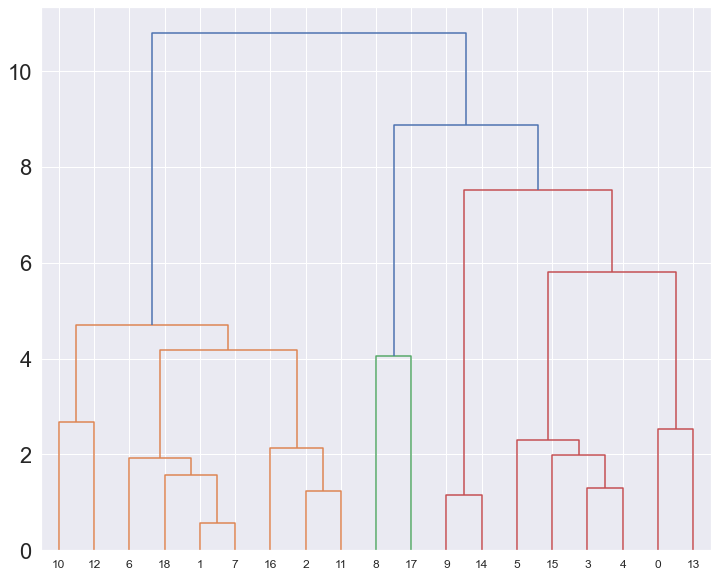

average :	0.00s


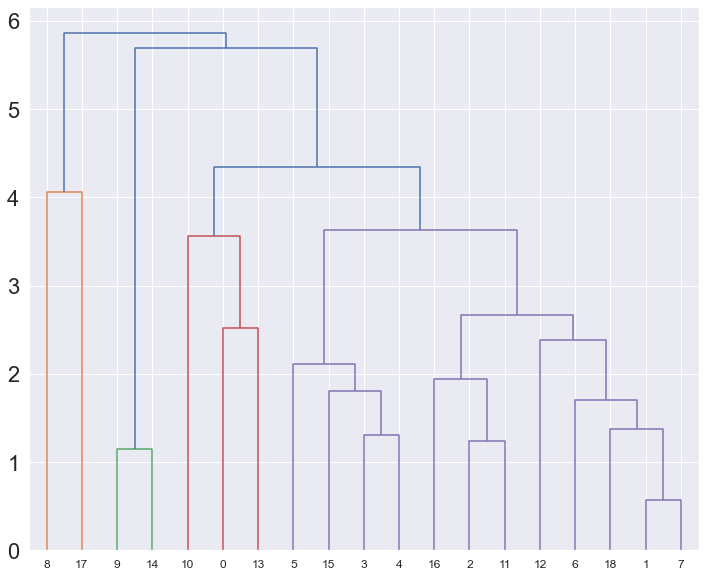

complete :	0.00s


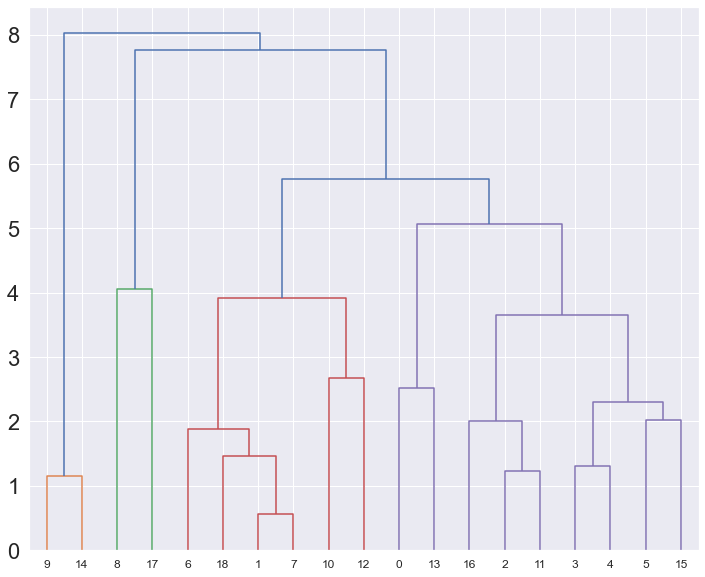

single :	0.00s


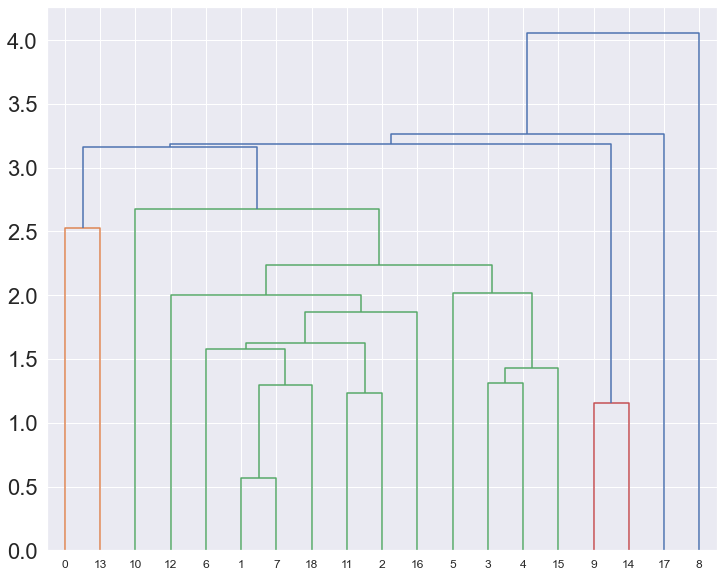

In [105]:
for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=None,
                            distance_threshold = 0)
    t0 = time()
    clustering.fit(X_scaled)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    
    plt.clf()
    plot_dendogram(clustering)
    #plot_clustering(X_scaled, clustering.labels_, "%s linkage" % linkage)


#plt.show()

**Modelo jerárquico escogido y número de clusters**

Si bien creo que los tipos de linkage de **Average** y **Complete** separan bien en 3 grupos, es decir se aprecia una clara separación en 3 grupos aproximados creo que no están lo suficientemente balanceados como para ser seleccionados.

Por todo ello considero que el mejor tipo de linkage es el **Ward** donde hay 3 grupos separados y además considero que están mejor balanceadas el número de CCAA.

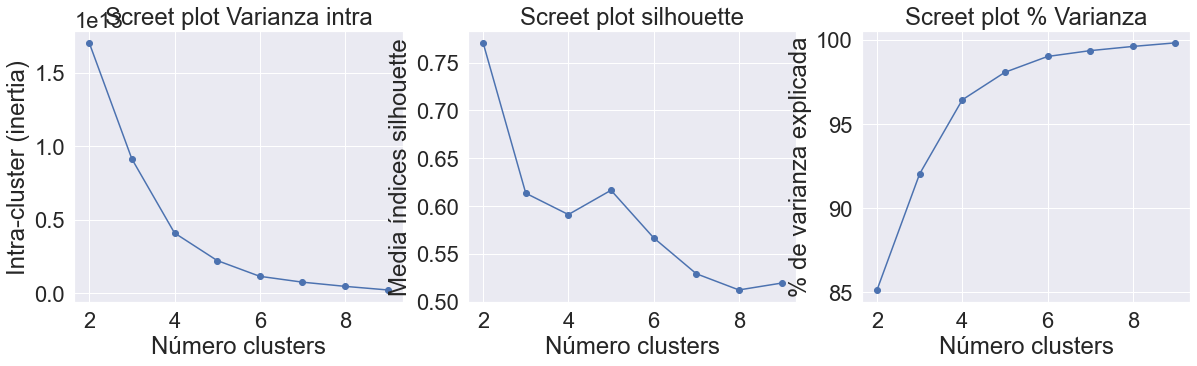

In [106]:
scree_plot_kmeans(elecciones,10)
plt.show()

Para el screet plot el codo lo considero en 3 claramente  así como el screet plot de varianza los 3 clusters nos da un muy buen resultado, el screet de silueta el segundo mejor resultado son los 3 clusteres, teniendo todo lo mencionado previamente considero la mejor solución utilizar 3 clusteres.

## 5- Toma una decisión sobre el número de clusters a considerar y realiza un análisis cluster mediante el método k-means.
<a id="4.5"></a>

In [107]:
modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=123)
modelo_kmeans.fit(X=X_scaled)
print('Varianza intra: ' + str(modelo_kmeans.inertia_))

print('Centroides')
print(modelo_kmeans.cluster_centers_)

print('Etiquetas')
modelo_kmeans.labels_[:5]


Varianza intra: 85.45911688866212
Centroides
[[-0.44524184 -0.45488128 -0.47861135  0.23913536  0.28229659 -0.33753367
  -0.78332581 -0.8438001  -0.83223195  0.89785172]
 [-0.60638065 -0.597334    1.09313661  0.08716843  0.46622506 -0.39066311
   1.10934211  1.17080629  1.01087312 -1.19630399]
 [ 1.40781597  1.41612029 -0.23163617 -0.51761207 -0.97435892  0.99822371
   0.30064436  0.34803389  0.48714439 -0.41982911]]
Etiquetas


array([2, 0, 0, 1, 1])

In [108]:
cluster_labels = modelo_kmeans.labels_
silhouette_score(X_scaled, cluster_labels)

0.33851407490278734

In [109]:
calinski_harabasz_score(X_scaled, cluster_labels)


9.786282556374728

In [110]:
import plotly.express as px
elecciones['cluster'] = cluster_labels
fig = px.scatter(elecciones, x='Population',y='AbstentionPtge', text=elecciones.index,color='cluster')
fig.show()

In [111]:
import plotly.express as px
elecciones['cluster'] = cluster_labels
fig = px.scatter(elecciones, x='totalEmpresas',y='Age_19_65_pct', text=elecciones.index,color='cluster')
fig.show()

Considero que los 3 grupos formados estan acordes a su tamaño teniendo en cuenta que siendo solo 19 CCAA no tiene sentido separarlas en 5 6 7 grupos. Otra observación es que esta separación separa el centro ecónomico del país, las comunidades costeras como Comunidad Valenciana, Cataluña País Vasco en un cluster, en otro cluster las CCAA del centro del país como Castilla y León, Asturias, Castilla la Mancha etc en otro cluster y finalmente las islas más Ceuta y Melilla mas Murcia.

Estos 3 clusters se podrían extrapolar al nivel de economía , población , las comunidades donde hay mas trabajo, Madrid, Barcelona, donde hay mas población.

Las métricas de evaluación no son muy buenas con un resultado del cociente de Calinski de 9.786 (Muy alejados de los 500 y 100 en los ejercicios observados en clase) y de silueta de 0.33.